In [2]:
import pandas as pd
import os
path = 'data/raw'
scores_df = pd.read_csv(os.path.join(path, 'scores_df_original.csv'))

In [78]:


with open(r'data/raw/2024-09-11 District A Scores.json', 'r') as file:
    scores_json = json.loads(file.read())

scores_data = scores_json[list(scores_json.keys())[0]]
scores_df = pd.DataFrame(scores_data)

In [ ]:
scores_df.info()

In [3]:
scores_df

studentId  studentLevel  year  measurementTypeId  subgroup_specialEd  \
0           44774             9  2018                  6                   0   
1           44774             8  2017                  6                   0   
2           44774             8  2017                  4                   0   
3           44775             8  2017                  4                   0   
4           44775             8  2017                  6                   0   
...           ...           ...   ...                ...                 ...   
303745     259510             5  2018                  3                   0   
303746     259511             5  2018                  3                   0   
303747     259512             5  2018                  3                   0   
303748     259513             5  2018                  3                   0   
303749     259514             5  2018                  3                   0   

        subgroup_lunchStatus  subgroup_gender  subgroup_ethnicity  \
0                          0                0                   0   
1                          0                0                   0   
2                          0                0                   0   
3                          0                0                   0   
4                          0                0                   0   
...                      ...              ...                 ...   
303745                     0                0                   0   
303746                     0                0                   0   
303747                     0                0                   0   
303748                     0                0                   0   
303749                     0                0                   0   

        subgroup_ell  subgroup_bottom25  ...  value_starReading  \
0                  0                  0  ...                  0   
1                  0                  0  ...                  0   
2                  0                  0  ...                  0   
3                  0                  0  ...                  0   
4                  0                  0  ...                  0   
...              ...                ...  ...                ...   
303745             0                  0  ...                  0   
303746             0                  0  ...                  0   
303747             0                  0  ...                  0   
303748             0                  0  ...                  0   
303749             0                  0  ...                  0   

        value_starMath  value_ScienceMilestones  value_LEAPScience  \
0                    0                        0                  0   
1                    0                        0                  0   
2                    0                        0                  0   
3                    0                        0                  0   
4                    0                        0                  0   
...                ...                      ...                ...   
303745               0                      510                  0   
303746               0                      464                  0   
303747               0                      454                  0   
303748               0                      520                  0   
303749               0                      481                  0   

        value_SocialMilestones  value_gcaInfo  value_gcaNar  value_gcaOpin  \
0                            0              0             0              0   
1                            0              0             0              0   
2                            0              0             0              0   
3                            0              0             0              0   
4                            0              0             0              0   
...                        ...            ...           ...            ...   
303745                    

# Scores vs. course section rosters

In [ ]:
# benchmarks_df

### import district data

In [79]:

json_file_path = 'data/raw/district.json'

with open(json_file_path, 'r') as json_file:
    data = json.load(json_file)

#normalize/ convert list to dict
def normalize_json_column(column):
    if isinstance(column, list) and len(column) > 0 and isinstance(column[0], dict):
        return pd.json_normalize(column, sep='_')
    return pd.DataFrame()  

# Normalize each column
benchmarks_2_df = normalize_json_column(data['benchmarks'])
schools_df = normalize_json_column(data['schools'])
course_sections_df = normalize_json_column(data['courseSections'])
course_section_rosters_df = normalize_json_column(data['courseSectionRosters']) #will only use this for this EDA
scores_2_df = normalize_json_column(data['scores']) 

In [5]:
benchmarks_2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          42 non-null     object
 1   districtId  42 non-null     object
 2   year        42 non-null     object
 3   level       42 non-null     object
 4   dataSource  42 non-null     object
 5   value       42 non-null     object
dtypes: object(6)
memory usage: 2.1+ KB


In [6]:
schools_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    20 non-null     object
 1   name                  20 non-null     object
 2   districtId            20 non-null     object
 3   costCenter            20 non-null     object
 4   abbreviation          20 non-null     object
 5   acqRequestSelectable  20 non-null     object
 6   oneRoster_sourcedId   20 non-null     object
 7   oneRoster_ticketId    20 non-null     object
dtypes: object(8)
memory usage: 1.4+ KB


In [7]:
course_sections_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17662 entries, 0 to 17661
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        17662 non-null  object
 1   vanityId  17662 non-null  object
 2   year      17662 non-null  object
 3   schoolId  17662 non-null  object
dtypes: object(4)
memory usage: 552.1+ KB


In [8]:
course_section_rosters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612241 entries, 0 to 612240
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               612241 non-null  object
 1   courseSectionId  612241 non-null  object
 2   studentId        612241 non-null  object
 3   studentLevel     612241 non-null  object
 4   ticket           612241 non-null  object
dtypes: object(5)
memory usage: 23.4+ MB


In [9]:
#
# Replace empty strings with '0' and directly assign the result back to the 'ticket' column
course_section_rosters_df['ticket'] = course_section_rosters_df['ticket'].replace('', '0')


In [10]:
course_section_rosters_df['ticket'].unique()

array(['0', 'RTI-Redville'], dtype=object)

In [11]:
scores_2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34317 entries, 0 to 34316
Data columns (total 71 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   id                                34317 non-null  object
 1   ticket                            34317 non-null  object
 2   studentId                         34317 non-null  object
 3   studentLevel                      34317 non-null  object
 4   year                              34317 non-null  object
 5   measurementTypeId                 34317 non-null  object
 6   subgroup_specialEd                34317 non-null  object
 7   subgroup_lunchStatus              34317 non-null  object
 8   subgroup_gender                   34317 non-null  object
 9   subgroup_ethnicity                34317 non-null  object
 10  subgroup_ell                      34317 non-null  object
 11  subgroup_bottom25                 34317 non-null  object
 12  value_actMathScore

In [12]:
course_section_rosters_df 

id courseSectionId studentId studentLevel        ticket
0       1047696           39975     45333            4             0
1       1047704           39975     56116            4             0
2       1047706           39975     45345            4             0
3       1047715           39975     45400            4             0
4       1047729           39975     45413            4             0
...         ...             ...       ...          ...           ...
612236  7254071          401685     53169            4  RTI-Redville
612237  7254072          401685     53170            3  RTI-Redville
612238  7254073          401685     53286            4  RTI-Redville
612239  7254074          401685     53399            3  RTI-Redville
612240  7254075          401685     53415            3  RTI-Redville

[612241 rows x 5 columns]

In [13]:
course_section_rosters_df['ticket'].unique()

array(['0', 'RTI-Redville'], dtype=object)

In [14]:
scores_df.columns

Index(['studentId', 'studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25',
       'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
       'value_actScienceScore', 'value_actCompositeScore', 'value_nweaMath',
       'value_nweaReading', 'value_nweaEnglish', 'value_iReadyMath',
       'value_iReadyReading', 'value_actMasteryComposite',
       'value_actMasteryReading', 'value_actMasteryMath',
       'value_actMasteryScience', 'value_actMasteryEnglish', 'value_nweaELA',
       'value_scantronMath', 'value_scantronReading', 'value_mapMath',
       'value_mapEnglish', 'value_mapReading', 'value_mapRLA',
       'value_scantronScience', 'value_scantronLanguage',
       'value_ReadingFoundations', 'value_scantronAlgebra', 'value_eocMath',
       'value_actELAScore', 'value_mapScience', 'value_LeapELAScale',
       'value_LeapMathScale', 'value_L

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)



In [37]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

for column in merged_df.columns:
    unique_values = merged_df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")

Unique values in column 'id':
[1047696 1047704 1047706 ... 7254073 7254074 7254075]


Unique values in column 'courseSectionId':
[ 39975  39976  39977 ... 401683 401684 401685]


Unique values in column 'studentId':
['45333' '56116' '45345' ... '97137' '97150' '97153']


Unique values in column 'studentLevel_x':
[ 4  3  2  1  0  8  5  7  6  9 10 11 12 98 99 97 96]


Unique values in column 'studentLevel_y':
[ 6  7  5  4  3  2 11 10  8  9 12 99  0 98 97  1 96]


Unique values in column 'year':
[2017 2018 2020]


Unique values in column 'measurementTypeId':
[4 6 5]


Unique values in column 'subgroup_specialEd':
[0 1]


Unique values in column 'subgroup_lunchStatus':
[0 1]


Unique values in column 'subgroup_gender':
[0]


Unique values in column 'subgroup_ethnicity':
[0]


Unique values in column 'subgroup_ell':
[0]


Unique values in column 'subgroup_bottom25':
[0 1]


Unique values in column 'value_actMathScore':
[ 0. 24. 22. 17. 18. 25. 14. 23. 16. 19. 26. 29. 32. 21. 28. 20. 27. 15.

- Note that ticket has '' instead of Nan- that will be replaced with 0

In [88]:


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


for column in course_section_rosters_df.columns:
    unique_values = course_section_rosters_df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")

Unique values in column 'id':
[1047696 1047704 1047706 ... 7254073 7254074 7254075]


Unique values in column 'courseSectionId':
[ 39975  39976  39977 ... 401683 401684 401685]


Unique values in column 'studentId':
[ 45333  56116  45345 ...  97153 259606 259601]


Unique values in column 'studentLevel':
[ 4  3  2  1  0  8  5  7  6 12 10  9 11 98 99 97 96]


Unique values in column 'ticket':
['' '0' 'RTI-Redville']




### Frequency of Each Value in `course_section_rosters_df`
- **Very few `RTI-redville` values** under the column `'ticket'`.
- Under the **`studentLevel`** column, the frequency of **96-97** is relatively lower than **98-99** but consists of **4,000 values** altogether.
- Under the **`courseSectionId`** column, the following IDs have a frequency of 10,000 values up to 73,000. Most other ID's have a frequency of under 1000

  - 63442, 63439, 118660, 118659, 118658, 80314, 80315, 80316, 63437, 63473, 63440
  - most ID's have a frequency of 100 and below

- 


In [89]:


# List of columns to check
columns_to_check = ['ticket', 'studentLevel'] #['courseSectionId']

# Print value counts for the specified columns
for column in columns_to_check:
    print(f"Value counts in column '{column}':")
    print(course_section_rosters_df[column].value_counts())
    print("\n")


Value counts in column 'ticket':
ticket
                610343
0                 1628
RTI-Redville       270
Name: count, dtype: int64


Value counts in column 'studentLevel':
studentLevel
10    54246
9     52595
7     51315
1     49253
4     49171
8     48846
2     48820
12    47993
3     47529
11    47342
5     41209
6     40529
0     28458
99     2930
98     1290
97      670
96       45
Name: count, dtype: int64




### StudentID column of course_section_rosters_df analysis
- listed in this cell due to data limits
- in column studentId, there is a frequency of the same ID up to 79 times. The frequency of ID's is usually on the lower end. 

In [ ]:
'''
# List of columns to check
columns_to_check_2 = [ 'studentId']

# Print value counts for the specified columns
for column in columns_to_check_2:
    print(f"Value counts in column '{column}':")
    print(course_section_rosters_df[column].value_counts())
    print("\n")
'''


### Note that the frequency of every id count is 1. 
- due to data limits, I only printed the first third on ID values

In [ ]:
'''
columns_to_check_3 = ['id']

# Print value counts for the specified columns, showing only the first third
for column in columns_to_check_3:
    value_counts = course_section_rosters_df[column].value_counts()
    third_length = len(value_counts) // 3  # third of length
    print(f"Value counts in column '{column}' (first third):")
    print(value_counts.iloc[:third_length])  # Print only the first third
    print("\n")
'''

In [ ]:
columns_to_check_3 = ['id']

# Print value counts for the specified columns where frequency is more than 1
for column in columns_to_check_3:
    value_counts = course_section_rosters_df[column].value_counts()
    filtered_values = value_counts[value_counts > 1]  # Filter values with frequency > 1
    print(f"Value counts in column '{column}' where frequency is more than 1:")
    print(filtered_values)
    print("\n")


# Import scores_df

In [ ]:
scores_df

## analyzing scores_df and addressing null values

In [ ]:
scores_df.columns

In [ ]:
scores_df.info()

**There are several missing values in  value_scantronMath** however, those were replaced by 0

In [5]:

null_count_value_scantronMath = scores_df['value_scantronMath'].isnull().sum()

print(f"Total number of nulls in 'value_scantronMath': {null_count_value_scantronMath}")


Total number of nulls in 'value_scantronMath': 50490


In [6]:
scores_df['value_scantronMath'].unique()

array([   0., 2841., 2808., ..., 3442., 3389., 3341.])

In [7]:
scores_df['value_scantronMath'].fillna(0, inplace=True)

C:\Users\Muru\AppData\Local\Temp\ipykernel_63536\3463980611.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  scores_df['value_scantronMath'].fillna(0, inplace=True)


In [8]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303750 entries, 0 to 303749
Data columns (total 58 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   studentId                         303750 non-null  int64  
 1   studentLevel                      303750 non-null  int64  
 2   year                              303750 non-null  int64  
 3   measurementTypeId                 303750 non-null  int64  
 4   subgroup_specialEd                303750 non-null  int64  
 5   subgroup_lunchStatus              303750 non-null  int64  
 6   subgroup_gender                   303750 non-null  int64  
 7   subgroup_ethnicity                303750 non-null  int64  
 8   subgroup_ell                      303750 non-null  int64  
 9   subgroup_bottom25                 303750 non-null  int64  
 10  value_actMathScore                303750 non-null  float64
 11  value_actEnglishScore             303750 non-null  f

### unique values in every column in scores_df

In [39]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

for column in scores_df.columns:
    unique_values = scores_df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")

Unique values in column 'studentId':
['44774' '44775' '44776' ... '259512' '259513' '259514']


Unique values in column 'studentLevel':
[ 9  8  6  7  5 12 11 10  4  3  2  1  0 99 98 97 96 -1]


Unique values in column 'year':
[2018 2017 2020 2015 2016 2014    0]


Unique values in column 'measurementTypeId':
[6 4 5 0 3 1 2 7]


Unique values in column 'subgroup_specialEd':
[   0    1    2 1000    7    6]


Unique values in column 'subgroup_lunchStatus':
[0 1 3 6 5]


Unique values in column 'subgroup_gender':
[0 4 3 6 5]


Unique values in column 'subgroup_ethnicity':
[ 0 10  9 18 17]


Unique values in column 'subgroup_ell':
[0 3]


Unique values in column 'subgroup_bottom25':
[0 1]


Unique values in column 'value_actMathScore':
[ 0. 14.  9. 15. 18. 16. 22. 25. 34. 17. 27. 13. 11. 19. 21. 20. 23. 24.
 12. 26. 30. 28. 29. 32. 10. 31. 36. 35. 33.]


Unique values in column 'value_actEnglishScore':
[ 0. 14.  3. 15. 25. 24. 21. 36. 11. 23. 16. 20. 17. 13. 22. 12. 10.  8.
  6.  7.  9. 19.

### range of values in columns of scores_df
- why does studentLevel have -1 as a value? and values in the 90s?
- what is the definition of the unique values in 'subgroup_specialEd'?

  - also need to understand the categories for measurementTypeId, and the other various subgroup categories

In [40]:
#prints the range of values
for column in scores_df.columns:
    if pd.api.types.is_numeric_dtype(scores_df[column]):
        min_value = scores_df[column].min()
        max_value = scores_df[column].max()
        print(f"Range of values in column '{column}': {min_value} to {max_value}")
    else:
        unique_values = scores_df[column].unique()
        print(f"Unique values in column '{column}':")
        print(unique_values)
    print("\n")

Unique values in column 'studentId':
['44774' '44775' '44776' ... '259512' '259513' '259514']


Range of values in column 'studentLevel': -1 to 99


Range of values in column 'year': 0 to 2020


Range of values in column 'measurementTypeId': 0 to 7


Range of values in column 'subgroup_specialEd': 0 to 1000


Range of values in column 'subgroup_lunchStatus': 0 to 6


Range of values in column 'subgroup_gender': 0 to 6


Range of values in column 'subgroup_ethnicity': 0 to 18


Range of values in column 'subgroup_ell': 0 to 3


Range of values in column 'subgroup_bottom25': 0 to 1


Range of values in column 'value_actMathScore': 0.0 to 36.0


Range of values in column 'value_actEnglishScore': 0.0 to 36.0


Range of values in column 'value_actReadingScore': 0.0 to 36.0


Range of values in column 'value_actScienceScore': 0.0 to 36.0


Range of values in column 'value_actCompositeScore': 0.0 to 35.0


Range of values in column 'value_nweaMath': 0.0 to 899.0


Range of values in column 'v

## the next section of code
- excludes columns which only contain 0's  (due to a large section of data having null ie zeros)
        - This helps me get a more accurate range for test scores
- also prints out columns which contain only 0's

In [41]:

score_columns = [
    'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
    'value_actScienceScore', 'value_actCompositeScore', 'value_nweaMath',
    'value_nweaReading', 'value_nweaEnglish', 'value_iReadyMath',
    'value_iReadyReading', 'value_actMasteryComposite', 'value_actMasteryReading',
    'value_actMasteryMath', 'value_actMasteryScience', 'value_actMasteryEnglish',
    'value_nweaELA', 'value_scantronMath', 'value_scantronReading', 
    'value_mapMath', 'value_mapEnglish', 'value_mapReading', 'value_mapRLA',
    'value_scantronScience', 'value_scantronLanguage', 'value_ReadingFoundations',
    'value_scantronAlgebra', 'value_eocMath', 'value_actELAScore', 'value_mapScience',
    'value_LeapELAScale', 'value_LeapMathScale', 'value_LeapALScale', 'value_LeapE2Scale',
    'value_LeapGmScale', 'value_LeapBlScale', 'value_LeapE3Scale', 'value_LeapUsScale',
    'value_E1Scale', 'value_UsEsScale', 'value_accessReadingScale', 'value_accessReadingProficiency',
    'value_accessCompositeScale', 'value_accesscompositeProficiency', 'value_dibelsReading', 
    'value_mapHistory', 'value_LEAPSocSci', 'value_scantronGeometry', 'value_MathMilestones',
    'value_ELAMilestones', 'value_starReading', 'value_starMath', 'value_ScienceMilestones', 
    'value_LEAPScience', 'value_SocialMilestones', 'value_gcaInfo', 'value_gcaNar', 'value_gcaOpin', 
    'value_aimsWebMath', 'value_aimsWebReading'
]

zero_only_columns = []  # To store columns with min and max both 0

for column in score_columns:
    if pd.api.types.is_numeric_dtype(scores_df[column]):
        min_value = scores_df[column].min()
        max_value = scores_df[column].max()
        
        if min_value == 0 and max_value == 0: # If both min and max are 0, add the column to the list
            zero_only_columns.append(column)
        else:
            # If the minimum is 0, skip it/ only show from the next minimum value
            if min_value == 0:
                non_zero_min_value = scores_df[column][scores_df[column] != 0].min()
                print(f"Range of values in column '{column}': {non_zero_min_value} to {max_value}")
            else:
                print(f"Range of values in column '{column}': {min_value} to {max_value}")
    else:
        unique_values = scores_df[column].unique()
        print(f"Unique values in column '{column}':")
        print(unique_values)
    print("\n")

# After the loop, print columns where min and max are both 0
if zero_only_columns:
    print("Columns with both minimum and maximum values of 0:")
    print(zero_only_columns)
else:
    print("No columns found with both minimum and maximum values of 0.")


Range of values in column 'value_actMathScore': 9.0 to 36.0


Range of values in column 'value_actEnglishScore': 3.0 to 36.0


Range of values in column 'value_actReadingScore': 1.0 to 36.0


Range of values in column 'value_actScienceScore': 1.0 to 36.0


Range of values in column 'value_actCompositeScore': 7.0 to 35.0


Range of values in column 'value_nweaMath': 116.0 to 899.0


Range of values in column 'value_nweaReading': 120.0 to 255.0




Range of values in column 'value_iReadyMath': 264 to 624


Range of values in column 'value_iReadyReading': 244 to 761


Range of values in column 'value_actMasteryComposite': 10.0 to 33.0


Range of values in column 'value_actMasteryReading': 7.0 to 33.0


Range of values in column 'value_actMasteryMath': 13.0 to 32.0


Range of values in column 'value_actMasteryScience': 8.0 to 33.0


Range of values in column 'value_actMasteryEnglish': 6.0 to 36.0


Range of values in column 'value_nweaELA': 305.0 to 898.0


Range of values in column 'value

### Columns with only 0's in the column
['value_nweaEnglish', 'value_mapEnglish', 'value_scantronAlgebra', 'value_eocMath', 'value_scantronGeometry', 'value_LEAPScience', 'value_gcaInfo', 'value_gcaNar', 'value_gcaOpin', 'value_aimsWebMath', 'value_aimsWebReading']

# dropping 0 columns

In [4]:
# Columns to drop
columns_to_drop = ['value_nweaEnglish',
     'value_mapEnglish', 'value_scantronAlgebra',
    'value_eocMath', 'value_scantronGeometry', 'value_LEAPScience',
    'value_gcaInfo', 'value_gcaNar', 'value_gcaOpin', 
    'value_aimsWebMath', 'value_aimsWebReading'
]

# Dropping the specified columns
scores_df = scores_df.drop(columns=columns_to_drop)

# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
scores_df


Cleaned DataFrame:


studentId  studentLevel  year  measurementTypeId  subgroup_specialEd  \
0           44774             9  2018                  6                   0   
1           44774             8  2017                  6                   0   
2           44774             8  2017                  4                   0   
3           44775             8  2017                  4                   0   
4           44775             8  2017                  6                   0   
...           ...           ...   ...                ...                 ...   
303745     259510             5  2018                  3                   0   
303746     259511             5  2018                  3                   0   
303747     259512             5  2018                  3                   0   
303748     259513             5  2018                  3                   0   
303749     259514             5  2018                  3                   0   

        subgroup_lunchStatus  subgroup_gender  subgroup_ethnicity  \
0                          0                0                   0   
1                          0                0                   0   
2                          0                0                   0   
3                          0                0                   0   
4                          0                0                   0   
...                      ...              ...                 ...   
303745                     0                0                   0   
303746                     0                0                   0   
303747                     0                0                   0   
303748                     0                0                   0   
303749                     0                0                   0   

        subgroup_ell  subgroup_bottom25  ...  \
0                  0                  0  ...   
1                  0                  0  ...   
2                  0                  0  ...   
3                  0                  0  ...   
4                  0                  0  ...   
...              ...                ...  ...   
303745             0                  0  ...   
303746             0                  0  ...   
303747             0                  0  ...   
303748             0                  0  ...   
303749             0                  0  ...   

        value_accesscompositeProficiency  value_dibelsReading  \
0                                      0                    0   
1                                      0                    0   
2                                      0                    0   
3                                      0                    0   
4                                      0                    0   
...                                  ...                  ...   
303745                                 0                    0   
303746                                 0                    0   
303747                                 0                    0   
303748                                 0                    0   
303749                                 0                    0   

        value_mapHistory  value_LEAPSocSci  value_MathMilestones  \
0                      0                 0                     0   
1                      0                 0                     0   
2                      0                 0                     0   
3                      0                 0                     0   
4                      0                 0                     0   
...                  ...               ...                   ...   
303745                 0                 0                   481   
303746                 0                 0                   490   
303747                 0                 0                   450   
303748                 0                 0                   494   
303749                 0                 0                   486   

        value_ELAMilestones  value_starRead

In [56]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303750 entries, 0 to 303749
Data columns (total 58 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   studentId                         303750 non-null  int64  
 1   studentLevel                      303750 non-null  int64  
 2   year                              303750 non-null  int64  
 3   measurementTypeId                 303750 non-null  int64  
 4   subgroup_specialEd                303750 non-null  int64  
 5   subgroup_lunchStatus              303750 non-null  int64  
 6   subgroup_gender                   303750 non-null  int64  
 7   subgroup_ethnicity                303750 non-null  int64  
 8   subgroup_ell                      303750 non-null  int64  
 9   subgroup_bottom25                 303750 non-null  int64  
 10  value_actMathScore                303750 non-null  float64
 11  value_actEnglishScore             303750 non-null  f

### frequency of values in score_df non-test score related columns
- relatively large number of values in years 2017-2018, and few in 2020
- StudentLevel: relatively large number of values between grades 4-8
- 'measurementTypeId'- large number of 3's, few 7's
- subgroup lunch- very few values in 1000? what does that mean?
- - subgroup ell only has 4 values under the second subcategory

In [42]:
# value counts of non score columns

# List of columns to check for value counts
columns_to_check = [
    'studentLevel', 'year', 'measurementTypeId', 
    'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender', 
    'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25']


for column in columns_to_check:
    print(f"Value counts in column '{column}':")
    print(scores_df[column].value_counts())
    print("\n")

Value counts in column 'studentLevel':
studentLevel
 4     39257
 5     39053
 3     38960
 6     38309
 7     37406
 8     36716
 2     17089
 10    13941
 9     13388
 11    11835
 1      8208
 0      5333
 12     3254
 98      654
 99      275
 97       59
 96        9
-1         4
Name: count, dtype: int64


Value counts in column 'year':
year
2017    151911
2018    116297
2016     32949
2015      1220
2014       936
2020       429
0            8
Name: count, dtype: int64


Value counts in column 'measurementTypeId':
measurementTypeId
3    158818
1     56669
2     39977
6     17895
4     17163
5      9537
0      3580
7       111
Name: count, dtype: int64


Value counts in column 'subgroup_specialEd':
subgroup_specialEd
0       290283
7         8212
6         4296
1          899
2           47
1000        13
Name: count, dtype: int64


Value counts in column 'subgroup_lunchStatus':
subgroup_lunchStatus
0    282087
1      9120
5      6268
6      6240
3        35
Name: count, dtype: i

In [ ]:
#value counts of student ID
    # there is a range of a frequency of 1-7 for each student ID
#scores_df['studentId'].value_counts()

# EDA

In [ ]:
# Check the column names
print(scores_df.columns)


### need to edit the code for the summary statistics

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


performance_metrics = [
    'value_actCompositeScore', 'value_nweaMath', 'value_nweaReading', 
    'value_iReadyMath', 'value_iReadyReading'
]

for metric in performance_metrics: # Boxplots for each performance metric by studentLevel
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=scores_df, x='studentLevel', y=metric)
    plt.title(f'Distribution of {metric} by Student Level')
    plt.xticks(rotation=90)
    plt.show()


for metric in performance_metrics: # Boxplots for each performance metric by year
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=scores_df, x='year', y=metric)
    plt.title(f'Distribution of {metric} by Year')
    plt.xticks(rotation=90)
    plt.show()

summary_stats = scores_df.groupby(['studentLevel', 'year'])[performance_metrics].describe()
print(summary_stats)


### need to edit the code for the summary statistics (for this too)

In [43]:

for metric in performance_metrics: # Line plots to see trends across student_level for each performance metric
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=scores_df, x='studentLevel', y=metric)
    plt.title(f'{metric} vs Student Level')
    plt.show()

for metric in performance_metrics: # Scatter plot showing performance based on student level
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=scores_df, x='studentLevel', y=metric)
    plt.title(f'{metric} vs Student Level (Scatterplot)')
    plt.show()

# Summary statistics by student level
student_level_stats = scores_df.groupby('studentLevel')[performance_metrics].describe()
print(student_level_stats)


ValueError: Could not interpret value `courseSectionId` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [ ]:
scores_df.columns

# correlation matrix

From the correlation matrix, it seems that a student's score on the math and reading compoenent are correlated
- regardless of the type of test- but is especially true with the ACT
- (need to further investigate this)
- 

### further analysis 
correlation between the students test scores during different years

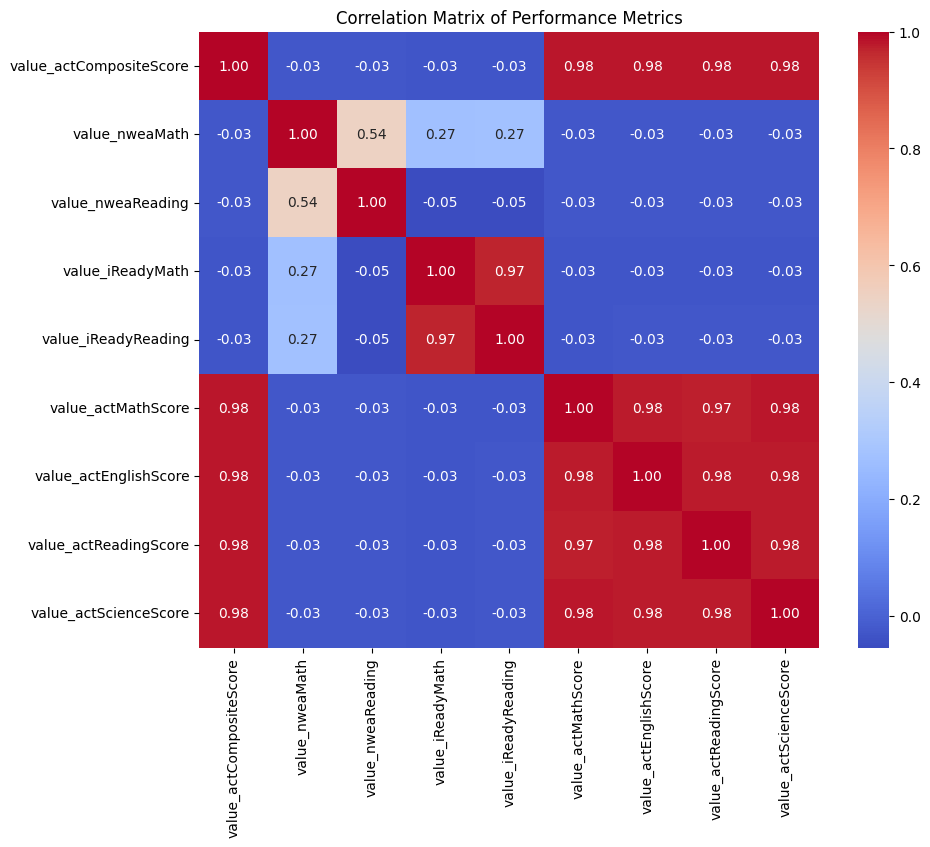

                                  value_actCompositeScore  value_nweaMath  \
studentId                                       -0.115741        0.162904   
measurementTypeId                                0.109112        0.068414   
subgroup_ell                                    -0.000473       -0.000765   
subgroup_bottom25                               -0.016300       -0.027587   
value_actMathScore                               0.981340       -0.027359   
value_actEnglishScore                            0.980398       -0.026561   
value_actReadingScore                            0.980918       -0.026720   
value_actScienceScore                            0.981843       -0.027078   
value_actCompositeScore                          1.000000       -0.027491   
value_nweaMath                                  -0.027491        1.000000   
value_nweaReading                               -0.028920        0.544939   
value_nweaEnglish                                     NaN             NaN   

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of performance metrics to analyze (random)
performance_metrics = [
    'value_actCompositeScore', 'value_nweaMath', 'value_nweaReading', 
    'value_iReadyMath', 'value_iReadyReading', 'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
       'value_actScienceScore'
]

# 1. Correlation Matrix for Performance Metrics
corr_matrix = scores_df[performance_metrics].corr()

# 2. Heatmap for Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Performance Metrics')
plt.show()

# 3. One-hot encode categorical variables that exist
categorical_columns = ['studentLevel', 'year', 'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender', 'subgroup_ethnicity']
scores_encoded = pd.get_dummies(scores_df, columns=categorical_columns)

# 4. Correlation with target performance metrics
correlations = scores_encoded.corr()[performance_metrics]
print(correlations)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of performance metrics to analyze (random)
performance_metrics = [
    'value_actCompositeScore', 'value_nweaMath', 'value_nweaReading', 
    'value_iReadyMath', 'value_iReadyReading', value_actMasteryComposte, value_act_MasteryReading, 'value_n]
]

# 1. Correlation Matrix for Performance Metrics
corr_matrix = scores_df[performance_metrics].corr()

# 2. Heatmap for Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Performance Metrics')
plt.show()

# 3. One-hot encode categorical variables that exist
categorical_columns = ['studentLevel', 'year', 'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender', 'subgroup_ethnicity']
scores_encoded = pd.get_dummies(scores_df, columns=categorical_columns)

# 4. Correlation with target performance metrics
correlations = scores_encoded.corr()[performance_metrics]
print(correlations)


In [45]:
scores_df.columns

Index(['studentId', 'studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25',
       'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
       'value_actScienceScore', 'value_actCompositeScore', 'value_nweaMath',
       'value_nweaReading', 'value_nweaEnglish', 'value_iReadyMath',
       'value_iReadyReading', 'value_actMasteryComposite',
       'value_actMasteryReading', 'value_actMasteryMath',
       'value_actMasteryScience', 'value_actMasteryEnglish', 'value_nweaELA',
       'value_scantronMath', 'value_scantronReading', 'value_mapMath',
       'value_mapEnglish', 'value_mapReading', 'value_mapRLA',
       'value_scantronScience', 'value_scantronLanguage',
       'value_ReadingFoundations', 'value_scantronAlgebra', 'value_eocMath',
       'value_actELAScore', 'value_mapScience', 'value_LeapELAScale',
       'value_LeapMathScale', 'value_L

### plotting boxplots to see relationships between test scores and subgroups
- haven't found anything significant yet from this data
- **DBC to see if there significant**

In [ ]:

# Box plots for different subgroups
subgroup_columns = ['subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender', 'subgroup_ethnicity']

for subgroup in subgroup_columns:
    for metric in performance_metrics:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=scores_df, x=subgroup, y=metric)
        plt.title(f'{metric} by {subgroup}')
        plt.show()




In [ ]:
scores_df.columns

### Distribution of scores across different test measures
- certain tests do not have a normally distributed range of scores
- This includes:
- certain tests have skewed data, but are fairly normally distributed
- These include:
- Certain tests have fairly normally distributed scores:
- These include:

We need more information about proficient scores in testing, as well as how the scoring works in order to identify whether the test scores accurately predict student performance. **(fill in more insights later)**

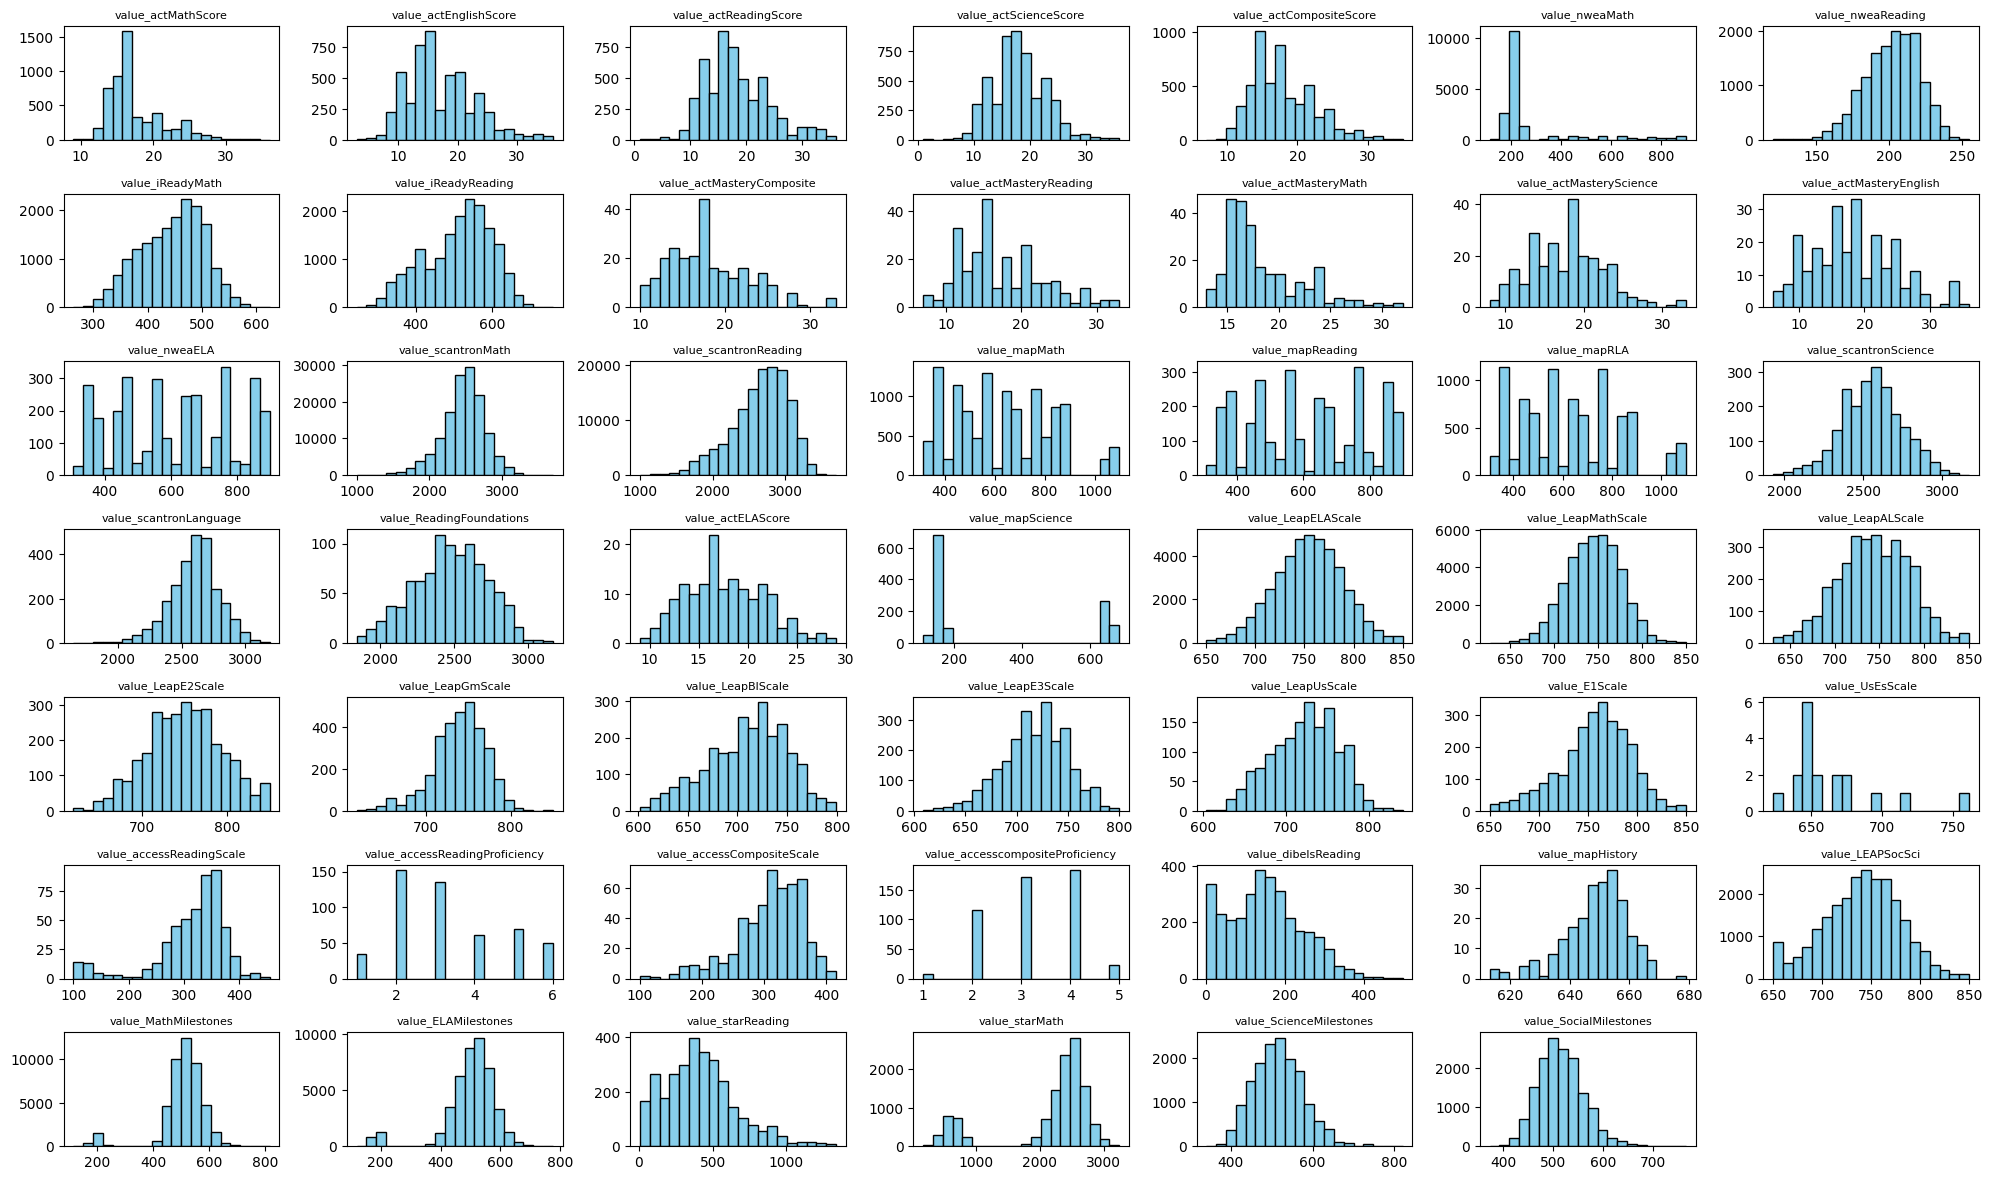

In [57]:

import matplotlib.pyplot as plt



score_columns = [
    'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
    'value_actScienceScore', 'value_actCompositeScore', 'value_nweaMath',
    'value_nweaReading', 'value_iReadyMath',
    'value_iReadyReading', 'value_actMasteryComposite', 'value_actMasteryReading',
    'value_actMasteryMath', 'value_actMasteryScience', 'value_actMasteryEnglish',
    'value_nweaELA', 'value_scantronMath', 'value_scantronReading', 
    'value_mapMath',  'value_mapReading', 'value_mapRLA',
    'value_scantronScience', 'value_scantronLanguage', 'value_ReadingFoundations',
     'value_actELAScore', 'value_mapScience',
    'value_LeapELAScale', 'value_LeapMathScale', 'value_LeapALScale', 'value_LeapE2Scale',
    'value_LeapGmScale', 'value_LeapBlScale', 'value_LeapE3Scale', 'value_LeapUsScale',
    'value_E1Scale', 'value_UsEsScale', 'value_accessReadingScale', 'value_accessReadingProficiency',
    'value_accessCompositeScale', 'value_accesscompositeProficiency', 'value_dibelsReading', 
    'value_mapHistory', 'value_LEAPSocSci', 'value_MathMilestones',
    'value_ELAMilestones', 'value_starReading', 'value_starMath', 'value_ScienceMilestones', 
    'value_SocialMilestones',
]

# Plotting frequency histograms for each score column, excluding values <= 0
plt.figure(figsize=(20, 15))  # Setting figure size
for i, col in enumerate(score_columns, 1):
    plt.subplot(9, 7, i)  # Adjust rows/columns based on the number of score columns
    # Filter out values <= 0 before plotting
    filtered_data = scores_df[col].dropna()
    filtered_data = filtered_data[filtered_data > 0]  # Exclude 0 and negative values
    plt.hist(filtered_data, bins=20, color='skyblue', edgecolor='black')  # Plot histogram
    plt.title(col, fontsize=8)
    plt.tight_layout(pad=1.0)

plt.show()


# testing out the score factors with diff subgroups

Note that certain testing measures do not have normally distributed scores. That may impact their predictability of student success

In [59]:
scores_df.columns

Index(['studentId', 'studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25',
       'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
       'value_actScienceScore', 'value_actCompositeScore', 'value_nweaMath',
       'value_nweaReading', 'value_iReadyMath', 'value_iReadyReading',
       'value_actMasteryComposite', 'value_actMasteryReading',
       'value_actMasteryMath', 'value_actMasteryScience',
       'value_actMasteryEnglish', 'value_nweaELA', 'value_scantronMath',
       'value_scantronReading', 'value_mapMath', 'value_mapReading',
       'value_mapRLA', 'value_scantronScience', 'value_scantronLanguage',
       'value_ReadingFoundations', 'value_actELAScore', 'value_mapScience',
       'value_LeapELAScale', 'value_LeapMathScale', 'value_LeapALScale',
       'value_LeapE2Scale', 'value_LeapGmScale', 'value_LeapBlScale',
       'value_

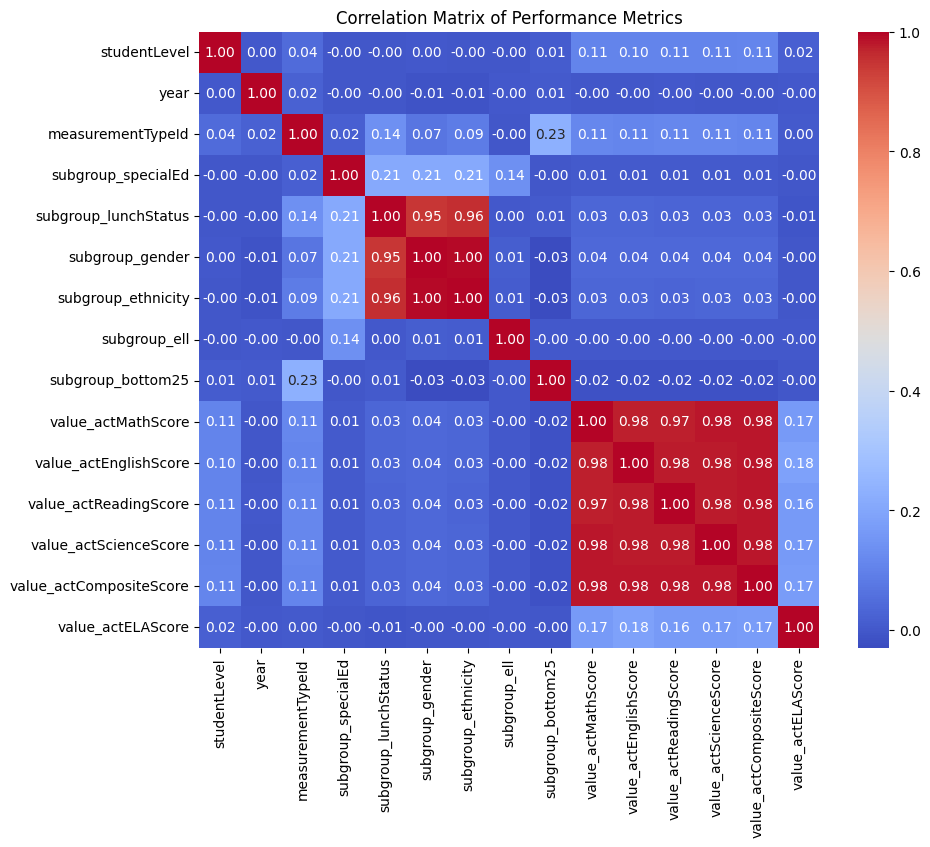

"\n# 3. One-hot encode categorical variables that exist\ncategorical_columns = ['studentLevel', 'year', 'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender', 'subgroup_ethnicity']\nscores_encoded = pd.get_dummies(scores_df, columns=categorical_columns)\n\n# 4. Correlation with target performance metrics\ncorrelations = scores_encoded.corr()[performance_metrics]\nprint(correlations)\n"

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of performance metrics to analyze (random)
performance_metrics = [
    'studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25', 'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
       'value_actScienceScore', 'value_actCompositeScore', 'value_actELAScore',
]

# 1. Correlation Matrix for Performance Metrics
corr_matrix = scores_df[performance_metrics].corr()

# 2. Heatmap for Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Performance Metrics')
plt.show()
'''
# 3. One-hot encode categorical variables that exist
categorical_columns = ['studentLevel', 'year', 'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender', 'subgroup_ethnicity']
scores_encoded = pd.get_dummies(scores_df, columns=categorical_columns)

# 4. Correlation with target performance metrics
correlations = scores_encoded.corr()[performance_metrics]
print(correlations)
'''


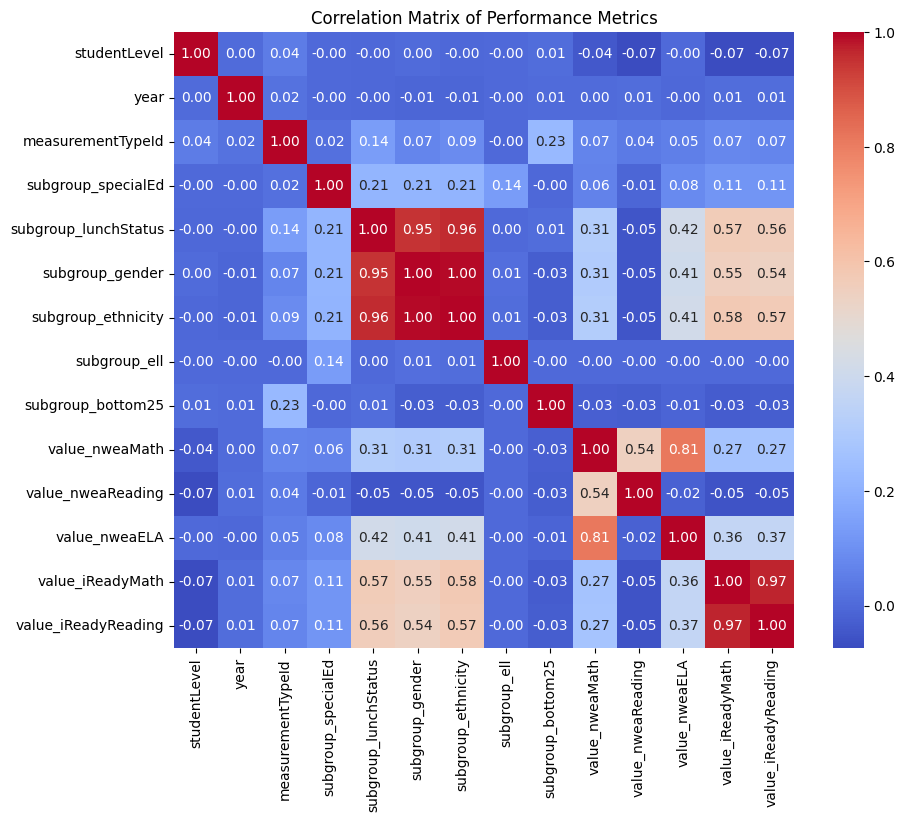

"\n# 3. One-hot encode categorical variables that exist\ncategorical_columns = ['studentLevel', 'year', 'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender', 'subgroup_ethnicity']\nscores_encoded = pd.get_dummies(scores_df, columns=categorical_columns)\n\n# 4. Correlation with target performance metrics\ncorrelations = scores_encoded.corr()[performance_metrics]\nprint(correlations)\n"

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of performance metrics to analyze (random)
performance_metrics = [
    'studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25', 'value_nweaMath',
       'value_nweaReading', 'value_nweaELA','value_iReadyMath', 'value_iReadyReading',

]

# 1. Correlation Matrix for Performance Metrics
corr_matrix = scores_df[performance_metrics].corr()

# 2. Heatmap for Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Performance Metrics')
plt.show()
'''
# 3. One-hot encode categorical variables that exist
categorical_columns = ['studentLevel', 'year', 'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender', 'subgroup_ethnicity']
scores_encoded = pd.get_dummies(scores_df, columns=categorical_columns)

# 4. Correlation with target performance metrics
correlations = scores_encoded.corr()[performance_metrics]
print(correlations)
'''


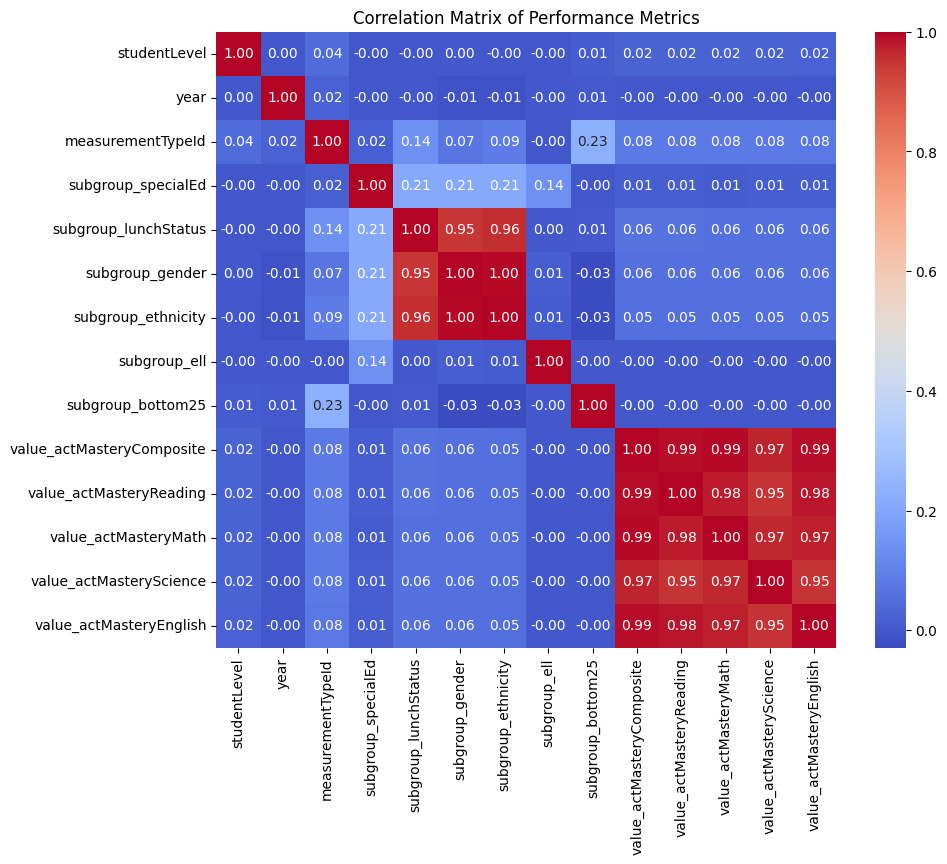

"\n# 3. One-hot encode categorical variables that exist\ncategorical_columns = ['studentLevel', 'year', 'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender', 'subgroup_ethnicity']\nscores_encoded = pd.get_dummies(scores_df, columns=categorical_columns)\n\n# 4. Correlation with target performance metrics\ncorrelations = scores_encoded.corr()[performance_metrics]\nprint(correlations)\n"

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of performance metrics to analyze (random)
performance_metrics = [
    'studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25', 'value_actMasteryComposite', 'value_actMasteryReading',
       'value_actMasteryMath', 'value_actMasteryScience',
       'value_actMasteryEnglish'

]

# 1. Correlation Matrix for Performance Metrics
corr_matrix = scores_df[performance_metrics].corr()

# 2. Heatmap for Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Performance Metrics')
plt.show()
'''
# 3. One-hot encode categorical variables that exist
categorical_columns = ['studentLevel', 'year', 'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender', 'subgroup_ethnicity']
scores_encoded = pd.get_dummies(scores_df, columns=categorical_columns)

# 4. Correlation with target performance metrics
correlations = scores_encoded.corr()[performance_metrics]
print(correlations)
'''


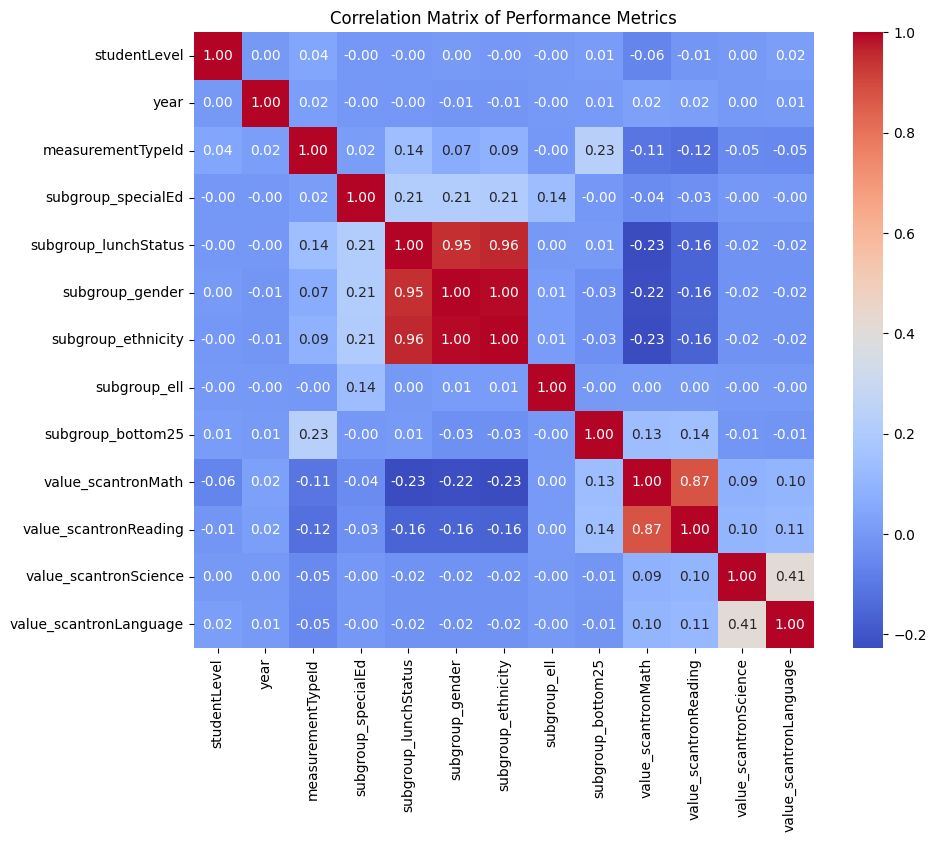

"\n# 3. One-hot encode categorical variables that exist\ncategorical_columns = ['studentLevel', 'year', 'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender', 'subgroup_ethnicity']\nscores_encoded = pd.get_dummies(scores_df, columns=categorical_columns)\n\n# 4. Correlation with target performance metrics\ncorrelations = scores_encoded.corr()[performance_metrics]\nprint(correlations)\n"

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of performance metrics to analyze (random)
performance_metrics = [
    'studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25', 'value_scantronMath',
       'value_scantronReading', 'value_scantronScience', 'value_scantronLanguage'

]

# 1. Correlation Matrix for Performance Metrics
corr_matrix = scores_df[performance_metrics].corr()

# 2. Heatmap for Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Performance Metrics')
plt.show()


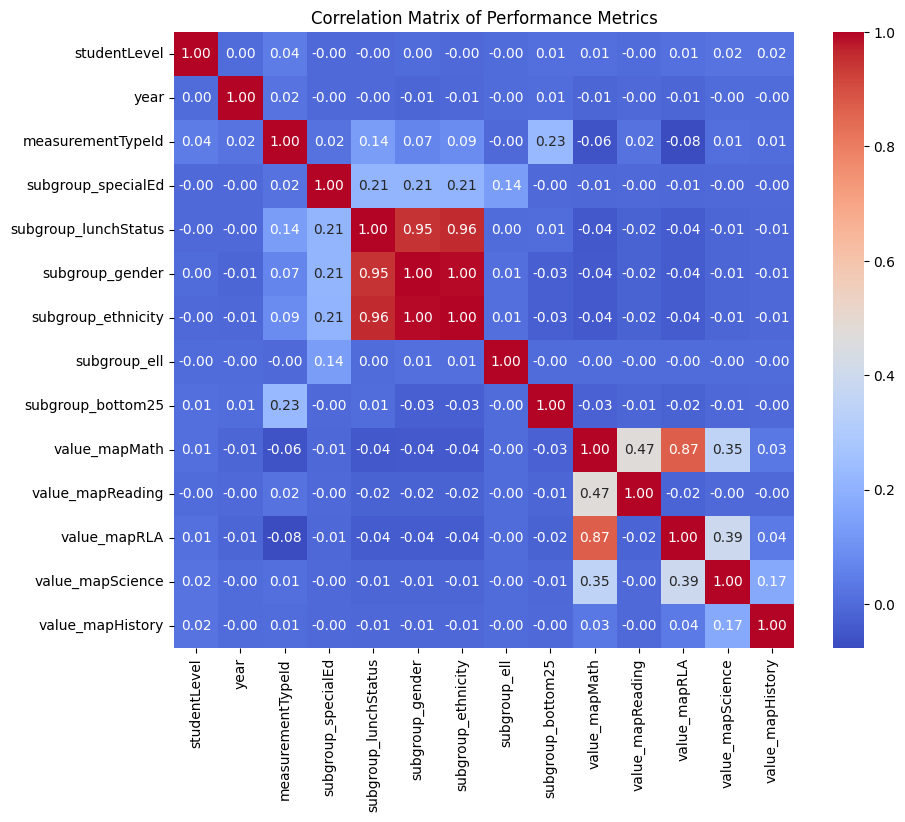

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of performance metrics to analyze (random)
performance_metrics = [
    'studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25', 'value_mapMath', 'value_mapReading',
       'value_mapRLA', 'value_mapScience','value_mapHistory'

]

# 1. Correlation Matrix for Performance Metrics
corr_matrix = scores_df[performance_metrics].corr()

# 2. Heatmap for Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Performance Metrics')
plt.show()


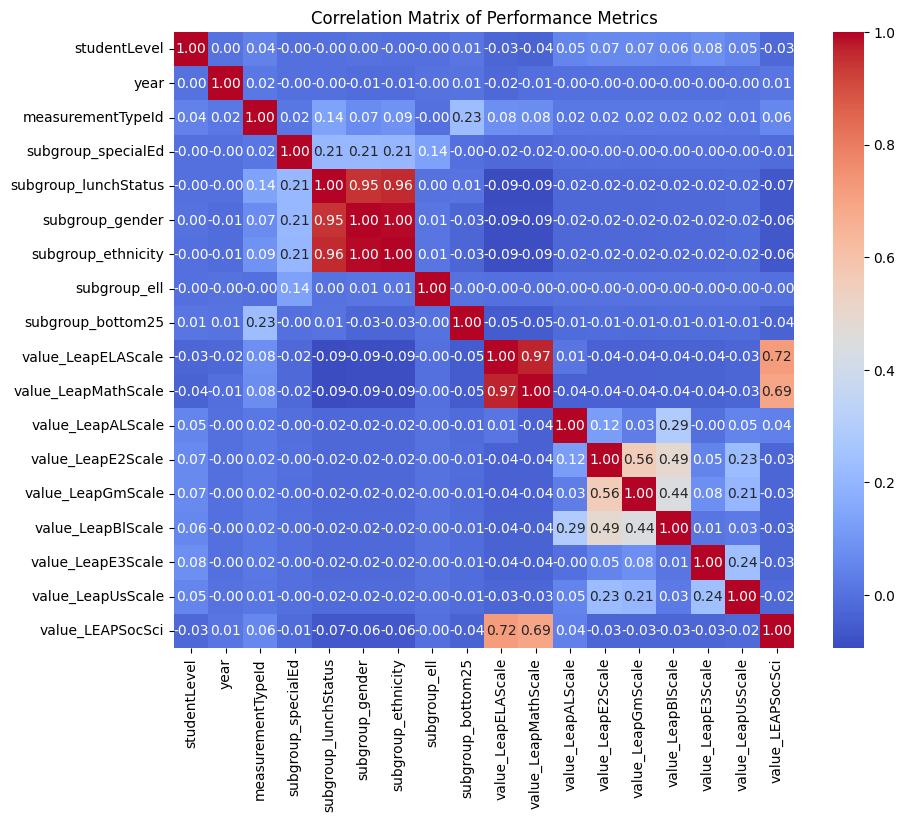

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of performance metrics to analyze (random)
performance_metrics = [
    'studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25', 'value_LeapELAScale', 'value_LeapMathScale', 'value_LeapALScale',
       'value_LeapE2Scale', 'value_LeapGmScale', 'value_LeapBlScale',
       'value_LeapE3Scale', 'value_LeapUsScale', 'value_LEAPSocSci',

]

# 1. Correlation Matrix for Performance Metrics
corr_matrix = scores_df[performance_metrics].corr()

# 2. Heatmap for Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Performance Metrics')
plt.show()


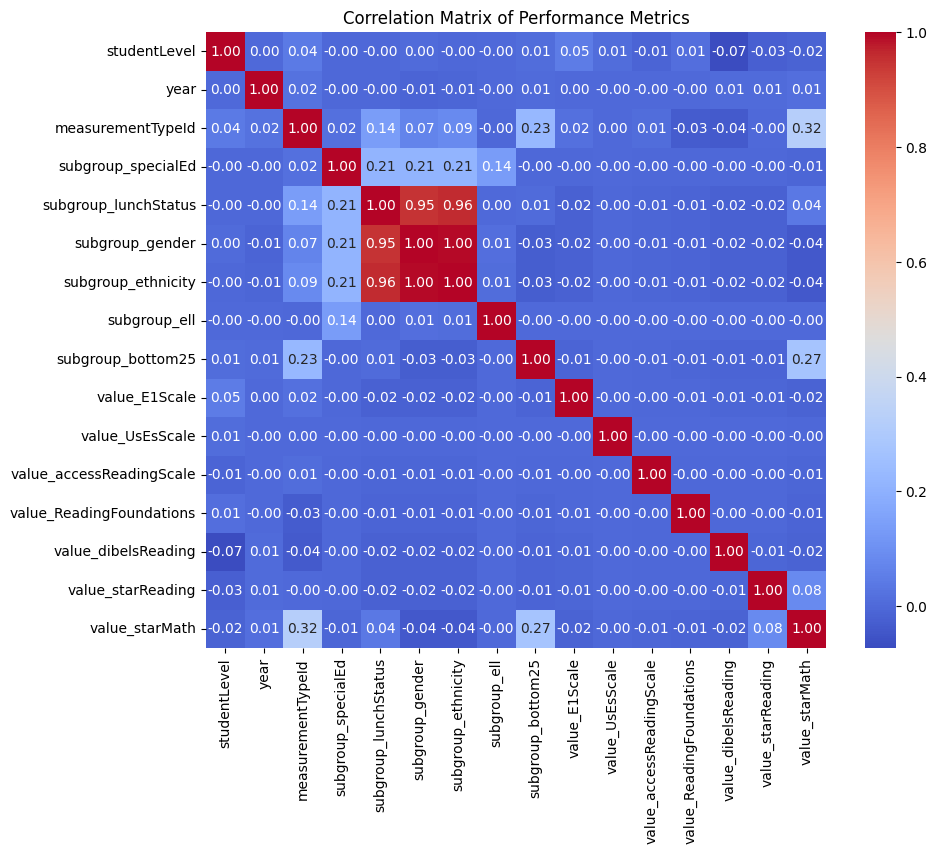

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of performance metrics to analyze (random)
performance_metrics = [
    'studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25', 'value_E1Scale',
       'value_UsEsScale', 'value_accessReadingScale', 'value_ReadingFoundations','value_dibelsReading',
'value_starReading','value_starMath',]

# 1. Correlation Matrix for Performance Metrics
corr_matrix = scores_df[performance_metrics].corr()

# 2. Heatmap for Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Performance Metrics')
plt.show()


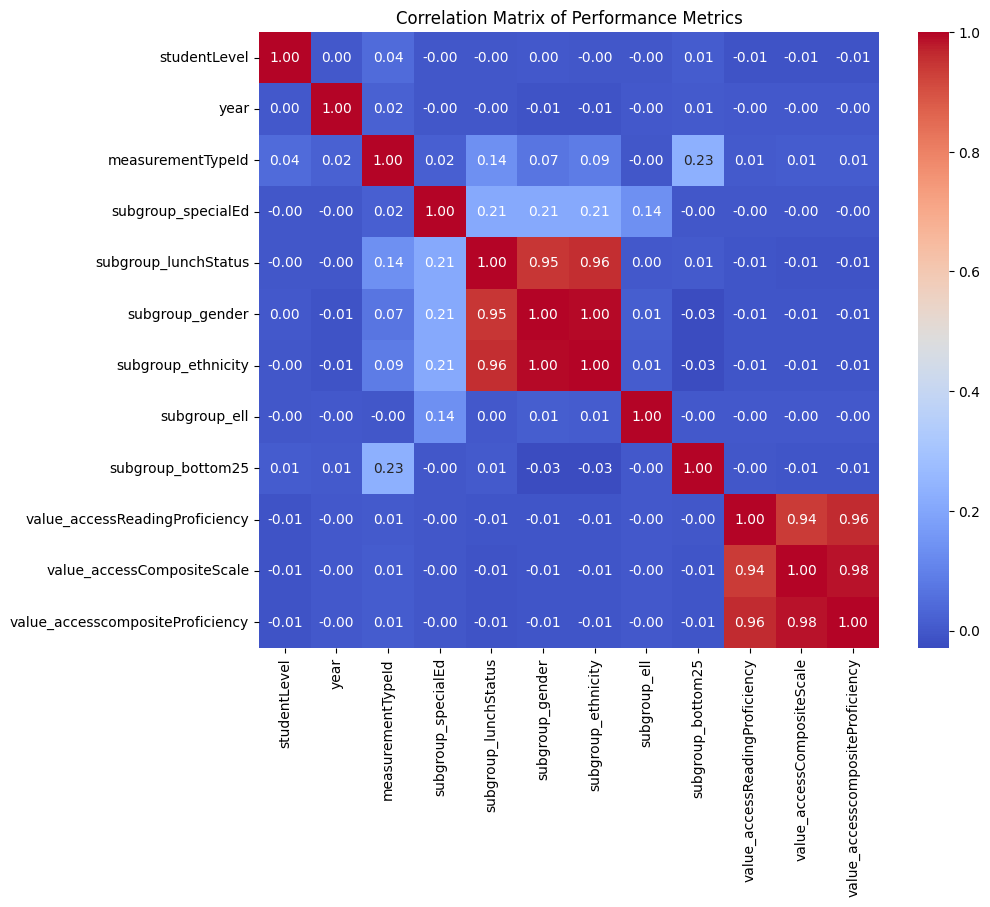

In [70]:


# List of performance metrics to analyze (random)
performance_metrics = [
    'studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25', 'value_accessReadingProficiency', 'value_accessCompositeScale',
       'value_accesscompositeProficiency'
]

# 1. Correlation Matrix for Performance Metrics
corr_matrix = scores_df[performance_metrics].corr()

# 2. Heatmap for Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Performance Metrics')
plt.show()


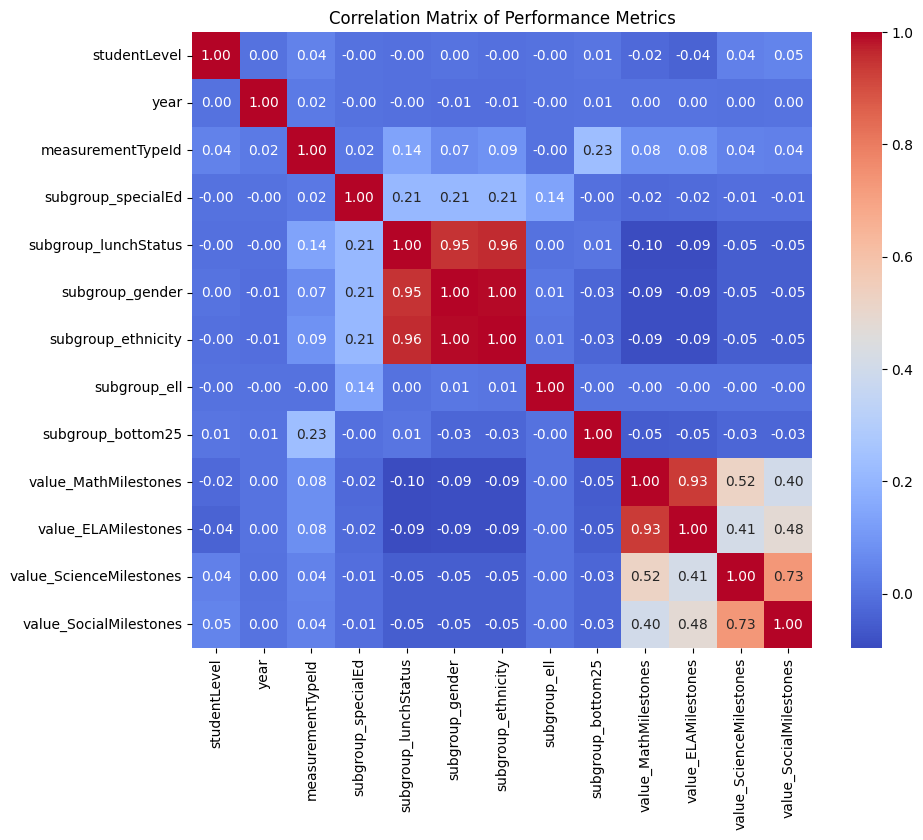

In [71]:


# List of performance metrics to analyze (random)
performance_metrics = [
    'studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25', 'value_MathMilestones',
       'value_ELAMilestones', 'value_ScienceMilestones', 'value_SocialMilestones'

]

# 1. Correlation Matrix for Performance Metrics
corr_matrix = scores_df[performance_metrics].corr()

# 2. Heatmap for Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Performance Metrics')
plt.show()


## correlation matrix with normal distributions

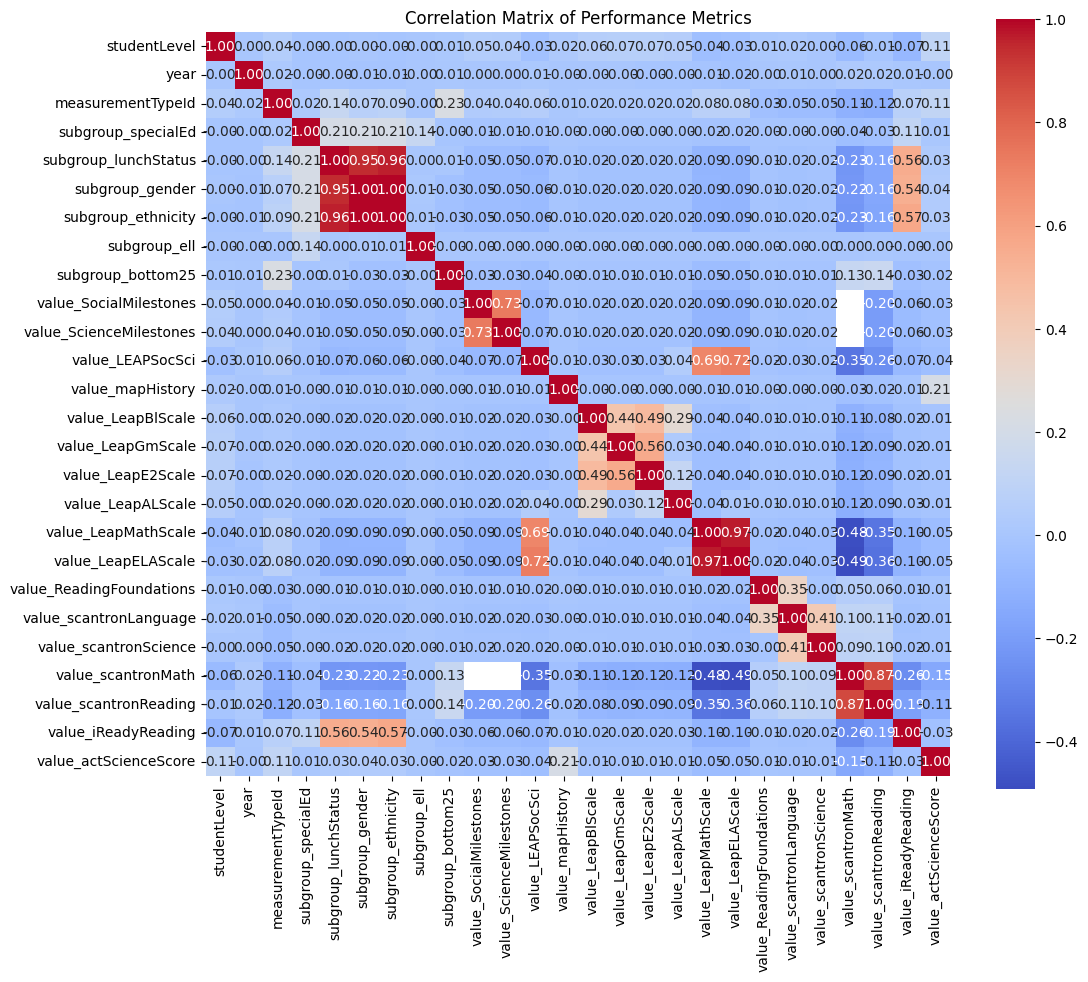

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Updated list of performance metrics to analyze
performance_metrics = [
    'studentLevel', 'year', 'measurementTypeId',
    'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
    'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25',
    'value_SocialMilestones', 'value_ScienceMilestones', 
    'value_LEAPSocSci', 'value_mapHistory', 'value_LeapBlScale', 
    'value_LeapGmScale',  'value_LeapE2Scale', 'value_LeapALScale', 
    'value_LeapMathScale', 'value_LeapELAScale', 'value_ReadingFoundations',
    'value_scantronLanguage', 'value_scantronScience', 
    'value_scantronMath', 'value_scantronReading', 
    'value_iReadyReading', 'value_actScienceScore'
]

# 1. Correlation Matrix for Performance Metrics
corr_matrix = scores_df[performance_metrics].corr()

# 2. Heatmap for Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of Performance Metrics')
plt.show()


In [74]:
scores_df.columns

Index(['studentId', 'studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25',
       'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
       'value_actScienceScore', 'value_actCompositeScore', 'value_nweaMath',
       'value_nweaReading', 'value_iReadyMath', 'value_iReadyReading',
       'value_actMasteryComposite', 'value_actMasteryReading',
       'value_actMasteryMath', 'value_actMasteryScience',
       'value_actMasteryEnglish', 'value_nweaELA', 'value_scantronMath',
       'value_scantronReading', 'value_mapMath', 'value_mapReading',
       'value_mapRLA', 'value_scantronScience', 'value_scantronLanguage',
       'value_ReadingFoundations', 'value_actELAScore', 'value_mapScience',
       'value_LeapELAScale', 'value_LeapMathScale', 'value_LeapALScale',
       'value_LeapE2Scale', 'value_LeapGmScale', 'value_LeapBlScale',
       'value_

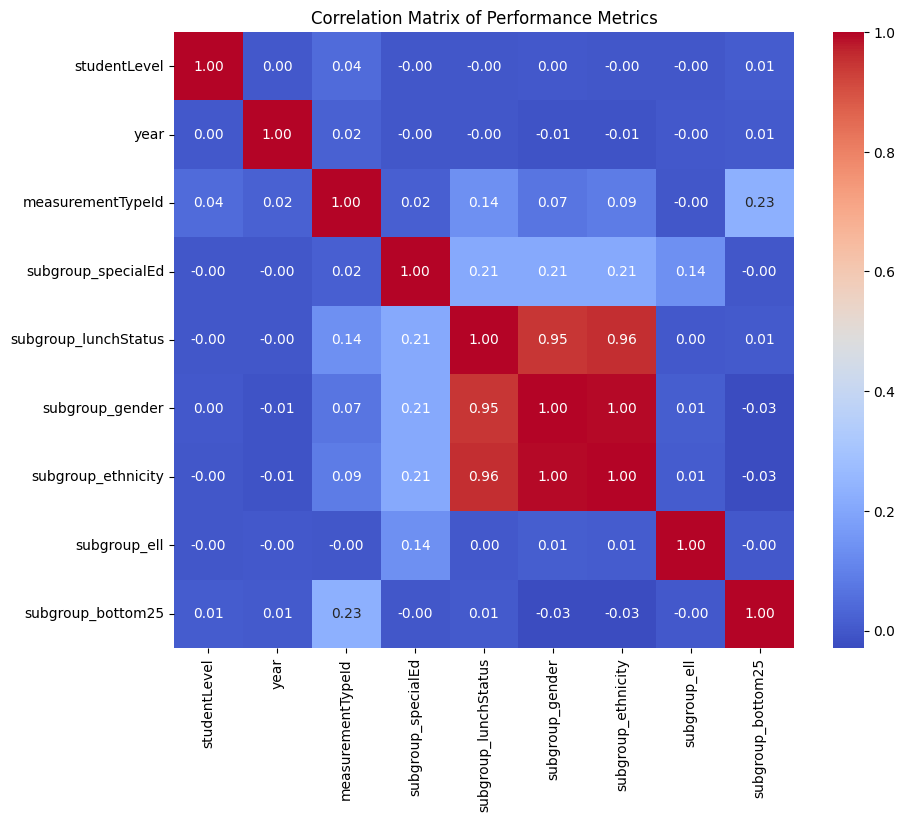

KeyError: "['studentLevel', 'year', 'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender', 'subgroup_ethnicity'] not in index"

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

subgroup_columns = ['studentLevel', 'year', 'measurementTypeId',
       'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender',
       'subgroup_ethnicity', 'subgroup_ell', 'subgroup_bottom25'] 

# 1. Correlation Matrix for Performance Metrics
corr_matrix = scores_df[subgroup_columns].corr()

# 2. Heatmap for Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Performance Metrics')
plt.show()

# 3. One-hot encode categorical variables that exist
categorical_columns = ['studentLevel', 'year', 'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender', 'subgroup_ethnicity']
scores_encoded = pd.get_dummies(scores_df, columns=categorical_columns)

# 4. Correlation with target performance metrics
correlations = scores_encoded.corr()[subgroup_columns]
print(correlations)


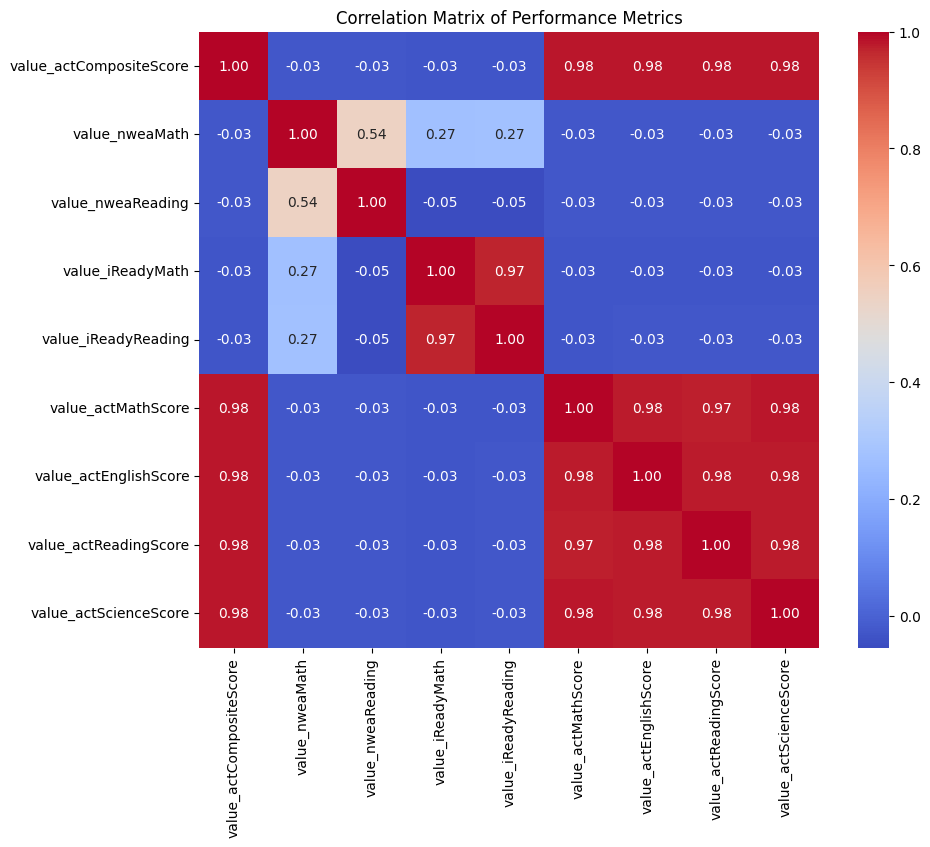

                       value_actCompositeScore  value_nweaMath  \
studentId                            -0.115741        0.162904   
measurementTypeId                     0.109112        0.068414   
subgroup_ell                         -0.000473       -0.000765   
subgroup_bottom25                    -0.016300       -0.027587   
value_actMathScore                    0.981340       -0.027359   
...                                        ...             ...   
subgroup_ethnicity_0                 -0.032078       -0.297552   
subgroup_ethnicity_9                 -0.002718       -0.004397   
subgroup_ethnicity_10                 0.014417       -0.016608   
subgroup_ethnicity_17                -0.014820        0.251956   
subgroup_ethnicity_18                 0.044737        0.220129   

                       value_nweaReading  value_iReadyMath  \
studentId                       0.414083         -0.082216   
measurementTypeId               0.041987          0.074225   
subgroup_ell         

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of performance metrics to analyze (random)
performance_metrics = [
    'value_actCompositeScore', 'value_nweaMath', 'value_nweaReading', 
    'value_iReadyMath', 'value_iReadyReading', 'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
       'value_actScienceScore'
]

# 1. Correlation Matrix for Performance Metrics
corr_matrix = scores_df[performance_metrics].corr()

# 2. Heatmap for Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Performance Metrics')
plt.show()

# 3. One-hot encode categorical variables that exist
categorical_columns = ['studentLevel', 'year', 'subgroup_specialEd', 'subgroup_lunchStatus', 'subgroup_gender', 'subgroup_ethnicity']
scores_encoded = pd.get_dummies(scores_df, columns=categorical_columns)

# 4. Correlation with target performance metrics
correlations = scores_encoded.corr()[performance_metrics]
print(correlations)


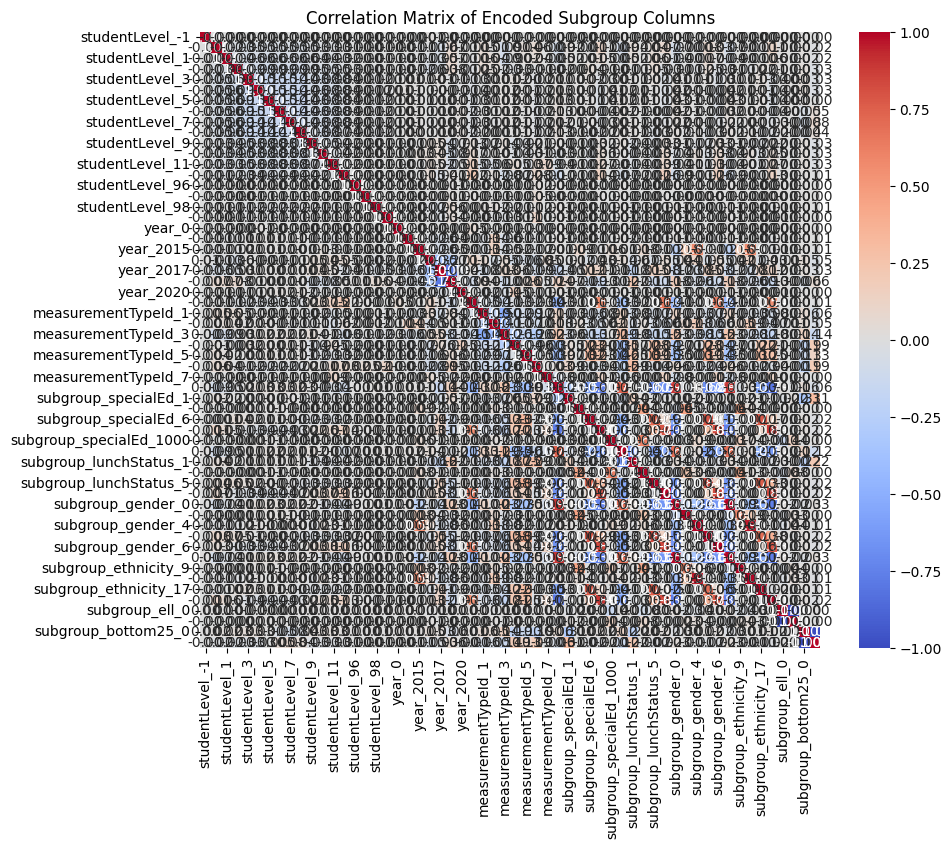

                       studentLevel_-1  studentLevel_0  studentLevel_1  \
studentId                     0.000975       -0.047447       -0.061663   
value_actMathScore           -0.000471       -0.006722       -0.021620   
value_actEnglishScore        -0.000457       -0.006822       -0.020988   
value_actReadingScore        -0.000460       -0.006572       -0.021114   
value_actScienceScore        -0.000466       -0.006881       -0.021397   
...                                ...             ...             ...   
subgroup_ethnicity_18        -0.000621        0.108383        0.058986   
subgroup_ell_0                0.000013        0.000485        0.000605   
subgroup_ell_3               -0.000013       -0.000485       -0.000605   
subgroup_bottom25_0           0.000475        0.017487        0.021799   
subgroup_bottom25_1          -0.000475       -0.017487       -0.021799   

                       studentLevel_2  studentLevel_3  studentLevel_4  \
studentId                    0.038177 

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

subgroup_columns = ['studentLevel', 'year', 'measurementTypeId',
                    'subgroup_specialEd', 'subgroup_lunchStatus', 
                    'subgroup_gender', 'subgroup_ethnicity', 
                    'subgroup_ell', 'subgroup_bottom25']

# 1. One-hot encode the subgroup columns to convert them into numerical binary variables
scores_encoded = pd.get_dummies(scores_df, columns=subgroup_columns)

# 2. Create a list of the newly encoded columns after one-hot encoding
encoded_columns = [col for col in scores_encoded.columns if any(subgroup in col for subgroup in subgroup_columns)]

# 3. Correlation Matrix for Encoded Columns (Now these columns are binary/numerical)
corr_matrix = scores_encoded[encoded_columns].corr()

# 4. Heatmap for Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Encoded Subgroup Columns')
plt.show()

# 5. Correlation with target performance metrics
correlations = scores_encoded.corr()[encoded_columns]
print(correlations)


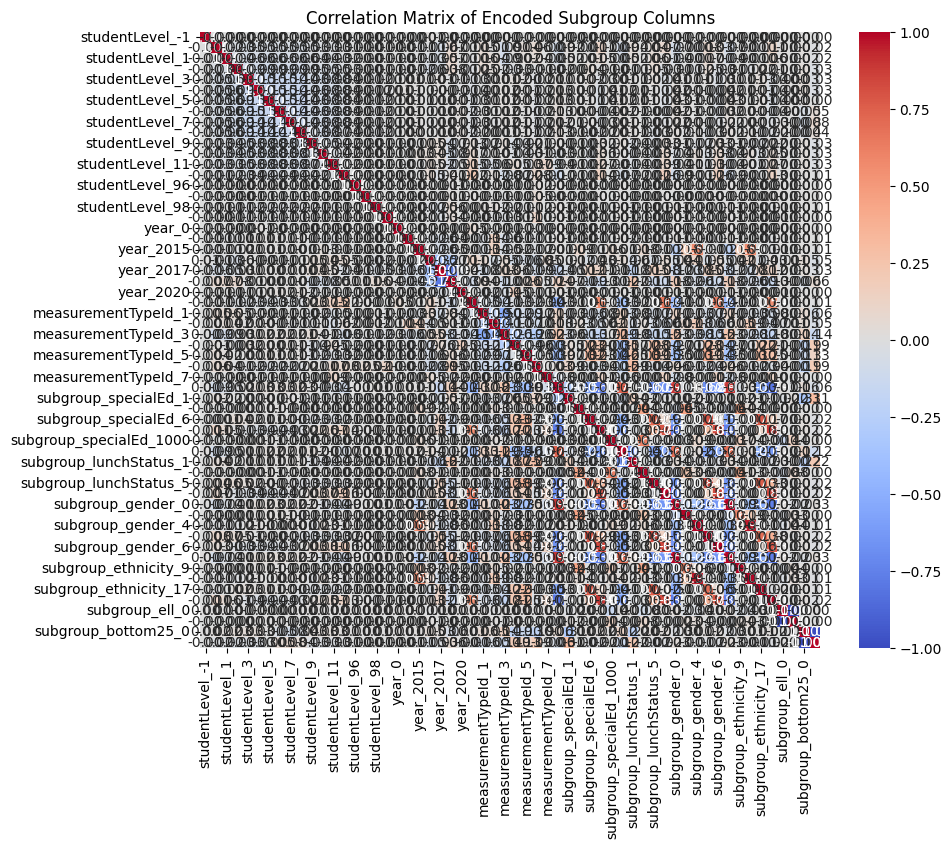

Correlations for studentLevel_11:
value_actMathScore         0.569193
value_actEnglishScore      0.552778
value_actReadingScore      0.557450
value_actScienceScore      0.562986
value_actCompositeScore    0.574006
value_LeapE3Scale          0.415028
Name: studentLevel_11, dtype: float64

--------------------------------------------------

Correlations for year_2015:
subgroup_gender_4        0.558697
subgroup_ethnicity_10    0.559665
Name: year_2015, dtype: float64

--------------------------------------------------

Correlations for year_2017:
year_2018   -0.787845
Name: year_2017, dtype: float64

--------------------------------------------------

Correlations for year_2018:
year_2017   -0.787845
Name: year_2018, dtype: float64

--------------------------------------------------

Correlations for measurementTypeId_0:
subgroup_specialEd_0     -0.431152
subgroup_specialEd_7      0.557155
subgroup_lunchStatus_6    0.638379
subgroup_gender_0        -0.414326
subgroup_gender_6         0.64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List of subgroup columns to one-hot encode
subgroup_columns = ['studentLevel', 'year', 'measurementTypeId',
                    'subgroup_specialEd', 'subgroup_lunchStatus', 
                    'subgroup_gender', 'subgroup_ethnicity', 
                    'subgroup_ell', 'subgroup_bottom25']

# 1. One-hot encode the subgroup columns to convert them into numerical binary variables
scores_encoded = pd.get_dummies(scores_df, columns=subgroup_columns)

# 2. Create a list of the newly encoded columns after one-hot encoding
encoded_columns = [col for col in scores_encoded.columns if any(subgroup in col for subgroup in subgroup_columns)]

# 3. Correlation Matrix for Encoded Columns (Now these columns are binary/numerical)
corr_matrix = scores_encoded[encoded_columns].corr()

# 4. Heatmap for Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Encoded Subgroup Columns')
plt.show()

# 5. Correlation with target performance metrics
correlations = scores_encoded.corr()[encoded_columns]

# 6. Filter correlations that are >= 0.4 and less than 1 (absolute values)
filtered_correlations = correlations[(correlations.abs() >= 0.4) & (correlations.abs() < 1)]

# 7. Print the filtered correlations (non-empty values only)
for col in filtered_correlations.columns:
    significant_corrs = filtered_correlations[col].dropna()
    if not significant_corrs.empty:
        print(f"Correlations for {col}:")
        print(significant_corrs)
        print("\n" + "-"*50 + "\n")


# individual useful correlations
Correlations for studentLevel_11:
value_actMathScore         0.569193
value_actEnglishScore      0.552778
value_actReadingScore      0.557450
value_actScienceScore      0.562986
value_actCompositeScore    0.574006
value_LeapE3Scale          0.415028
Name: studentLevel_11, dtype: float64

--------------------------------------------------

Correlations for year_2015:
subgroup_gender_4        0.558697
subgroup_ethnicity_10    0.559665
Name: year_2015, dtype: float64

--------------------------------------------------

Correlations for year_2017:
year_2018   -0.787845
Name: year_2017, dtype: float64

--------------------------------------------------

Correlations for year_2018:
year_2017   -0.787845
Name: year_2018, dtype: float64

--------------------------------------------------

Correlations for measurementTypeId_0:
subgroup_specialEd_0     -0.431152
subgroup_specialEd_7      0.557155
subgroup_lunchStatus_6    0.638379
subgroup_gender_0        -0.414326
subgroup_gender_6         0.645980
subgroup_ethnicity_0     -0.414326
subgroup_ethnicity_18     0.543093
Name: measurementTypeId_0, dtype: float64

--------------------------------------------------

Correlations for measurementTypeId_1:
measurementTypeId_3   -0.501327
Name: measurementTypeId_1, dtype: float64

--------------------------------------------------

Correlations for measurementTypeId_2:
measurementTypeId_3   -0.407528
Name: measurementTypeId_2, dtype: float64

--------------------------------------------------

Correlations for measurementTypeId_3:
studentId                0.630313
value_scantronMath      -0.407883
value_scantronReading   -0.403522
measurementTypeId_1     -0.501327
measurementTypeId_2     -0.407528
Name: measurementTypeId_3, dtype: float64

--------------------------------------------------

Correlations for measurementTypeId_5:
subgroup_lunchStatus_0   -0.459556
Name: measurementTypeId_5, dtype: float64

--------------------------------------------------

Correlations for measurementTypeId_7:
value_actMasteryComposite    0.685019
value_actMasteryReading      0.681842
value_actMasteryMath         0.672643
value_actMasteryScience      0.672233
value_actMasteryEnglish      0.678146
Name: measurementTypeId_7, dtype: float64

--------------------------------------------------

Correlations for subgroup_specialEd_0:
value_iReadyMath         -0.575697
value_iReadyReading      -0.567181
value_nweaELA            -0.410647
measurementTypeId_0      -0.431152
subgroup_specialEd_6     -0.556087
subgroup_specialEd_7     -0.773915
subgroup_lunchStatus_0    0.746480
subgroup_lunchStatus_5   -0.673922
subgroup_lunchStatus_6   -0.672383
subgroup_gender_0         0.896350
subgroup_gender_5        -0.682327
subgroup_gender_6        -0.663863
subgroup_ethnicity_0      0.896350
subgroup_ethnicity_17    -0.527835
subgroup_ethnicity_18    -0.794023
Name: subgroup_specialEd_0, dtype: float64

--------------------------------------------------

Correlations for subgroup_specialEd_2:
subgroup_lunchStatus_3    0.443729
subgroup_gender_3         0.451912
subgroup_ethnicity_9      0.444229
Name: subgroup_specialEd_2, dtype: float64

--------------------------------------------------

Correlations for subgroup_specialEd_6:
value_iReadyMath          0.499690
value_iReadyReading       0.514198
subgroup_specialEd_0     -0.556087
subgroup_lunchStatus_0   -0.432214
subgroup_lunchStatus_5    0.717676
subgroup_gender_0        -0.534726
subgroup_gender_5         0.789403
subgroup_ethnicity_0     -0.534726
subgroup_ethnicity_17     0.769848
Name: subgroup_specialEd_6, dtype: float64

--------------------------------------------------

Correlations for subgroup_specialEd_7:
measurementTypeId_0       0.557155
subgroup_specialEd_0     -0.773915
subgroup_lunchStatus_0   -0.601520
subgroup_lunchStatus_6    0.790389
subgroup_gender_0        -0.744187
subgroup_gender_6         0.838676
subgroup_ethnicity_0     -0.744187
subgroup_ethnicity_18     0.886475
Name: subgroup_specialEd_7, dtype: float64

--------------------------------------------------

Correlations for subgroup_specialEd_1000:
subgroup_lunchStatus_3    0.609427
Name: subgroup_specialEd_1000, dtype: float64

--------------------------------------------------

Correlations for subgroup_lunchStatus_0:
value_iReadyMath         -0.434867
value_iReadyReading      -0.428379
measurementTypeId_5      -0.459556
subgroup_specialEd_0      0.746480
subgroup_specialEd_6     -0.432214
subgroup_specialEd_7     -0.601520
subgroup_lunchStatus_1   -0.634879
subgroup_lunchStatus_5   -0.523801
subgroup_lunchStatus_6   -0.522605
subgroup_gender_0         0.690200
subgroup_gender_5        -0.530334
subgroup_gender_6        -0.515983
subgroup_ethnicity_0      0.690200
subgroup_ethnicity_17    -0.410256
subgroup_ethnicity_18    -0.617149
Name: subgroup_lunchStatus_0, dtype: float64

--------------------------------------------------

Correlations for subgroup_lunchStatus_1:
value_starMath            0.506163
subgroup_lunchStatus_0   -0.634879
Name: subgroup_lunchStatus_1, dtype: float64

--------------------------------------------------

Correlations for subgroup_lunchStatus_3:
subgroup_specialEd_2       0.443729
subgroup_specialEd_1000    0.609427
subgroup_ethnicity_9       0.411832
Name: subgroup_lunchStatus_3, dtype: float64

--------------------------------------------------

Correlations for subgroup_lunchStatus_5:
value_iReadyMath          0.579818
value_iReadyReading       0.586003
subgroup_specialEd_0     -0.673922
subgroup_specialEd_6      0.717676
subgroup_lunchStatus_0   -0.523801
subgroup_gender_0        -0.648035
subgroup_gender_5         0.842157
subgroup_ethnicity_0     -0.648035
subgroup_ethnicity_17     0.751041
Name: subgroup_lunchStatus_5, dtype: float64

--------------------------------------------------

Correlations for subgroup_lunchStatus_6:
measurementTypeId_0       0.638379
subgroup_specialEd_0     -0.672383
subgroup_specialEd_7      0.790389
subgroup_lunchStatus_0   -0.522605
subgroup_gender_0        -0.646555
subgroup_gender_6         0.837596
subgroup_ethnicity_0     -0.646555
subgroup_ethnicity_18     0.825016
Name: subgroup_lunchStatus_6, dtype: float64

--------------------------------------------------

Correlations for subgroup_gender_0:
value_iReadyMath         -0.551646
value_iReadyReading      -0.543477
measurementTypeId_0      -0.414326
subgroup_specialEd_0      0.896350
subgroup_specialEd_6     -0.534726
subgroup_specialEd_7     -0.744187
subgroup_lunchStatus_0    0.690200
subgroup_lunchStatus_5   -0.648035
subgroup_lunchStatus_6   -0.646555
subgroup_gender_5        -0.656117
subgroup_gender_6        -0.638362
subgroup_ethnicity_17    -0.507559
subgroup_ethnicity_18    -0.763523
Name: subgroup_gender_0, dtype: float64

--------------------------------------------------

Correlations for subgroup_gender_3:
subgroup_specialEd_2    0.451912
subgroup_ethnicity_9    0.596656
Name: subgroup_gender_3, dtype: float64

--------------------------------------------------

Correlations for subgroup_gender_4:
year_2015                0.558697
subgroup_ethnicity_10    0.957857
Name: subgroup_gender_4, dtype: float64

--------------------------------------------------

Correlations for subgroup_gender_5:
value_iReadyMath          0.584746
value_iReadyReading       0.592287
subgroup_specialEd_0     -0.682327
subgroup_specialEd_6      0.789403
subgroup_lunchStatus_0   -0.530334
subgroup_lunchStatus_5    0.842157
subgroup_gender_0        -0.656117
subgroup_ethnicity_0     -0.656117
subgroup_ethnicity_17     0.695285
Name: subgroup_gender_5, dtype: float64

--------------------------------------------------

Correlations for subgroup_gender_6:
measurementTypeId_0       0.645980
subgroup_specialEd_0     -0.663863
subgroup_specialEd_7      0.838676
subgroup_lunchStatus_0   -0.515983
subgroup_lunchStatus_6    0.837596
subgroup_gender_0        -0.638362
subgroup_ethnicity_0     -0.638362
subgroup_ethnicity_18     0.781779
Name: subgroup_gender_6, dtype: float64

--------------------------------------------------

Correlations for subgroup_ethnicity_0:
value_iReadyMath         -0.551646
value_iReadyReading      -0.543477
measurementTypeId_0      -0.414326
subgroup_specialEd_0      0.896350
subgroup_specialEd_6     -0.534726
subgroup_specialEd_7     -0.744187
subgroup_lunchStatus_0    0.690200
subgroup_lunchStatus_5   -0.648035
subgroup_lunchStatus_6   -0.646555
subgroup_gender_5        -0.656117
subgroup_gender_6        -0.638362
subgroup_ethnicity_17    -0.507559
subgroup_ethnicity_18    -0.763523
Name: subgroup_ethnicity_0, dtype: float64

--------------------------------------------------

Correlations for subgroup_ethnicity_9:
subgroup_specialEd_2      0.444229
subgroup_lunchStatus_3    0.411832
subgroup_gender_3         0.596656
Name: subgroup_ethnicity_9, dtype: float64

--------------------------------------------------

Correlations for subgroup_ethnicity_10:
year_2015            0.559665
subgroup_gender_4    0.957857
Name: subgroup_ethnicity_10, dtype: float64

--------------------------------------------------

Correlations for subgroup_ethnicity_17:
value_iReadyMath          0.477317
value_iReadyReading       0.485887
subgroup_specialEd_0     -0.527835
subgroup_specialEd_6      0.769848
subgroup_lunchStatus_0   -0.410256
subgroup_lunchStatus_5    0.751041
subgroup_gender_0        -0.507559
subgroup_gender_5         0.695285
subgroup_ethnicity_0     -0.507559
Name: subgroup_ethnicity_17, dtype: float64

--------------------------------------------------

Correlations for subgroup_ethnicity_18:
measurementTypeId_0       0.543093
subgroup_specialEd_0     -0.794023
subgroup_specialEd_7      0.886475
subgroup_lunchStatus_0   -0.617149
subgroup_lunchStatus_6    0.825016
subgroup_gender_0        -0.763523
subgroup_gender_6         0.781779
subgroup_ethnicity_0     -0.763523
Name: subgroup_ethnicity_18, dtype: float64

--------------------------------------------------

Correlations for subgroup_ell_0:
subgroup_ell_3   -1.0
Name: subgroup_ell_0, dtype: float64

--------------------------------------------------

Correlations for subgroup_ell_3:
subgroup_ell_0   -1.0
Name: subgroup_ell_3, dtype: float64

--------------------------------------------------

Correlations for subgroup_bottom25_0:
subgroup_bottom25_1   -1.0
Name: subgroup_bottom25_0, dtype: float64

--------------------------------------------------

Correlations for subgroup_bottom25_1:
subgroup_bottom25_0   -1.0
Name: subgroup_bottom25_1, dtype: float64

--------------------------------------------------



In [16]:
updated_scores_df = scores_df.copy()
updated_scores_df.to_csv('updated_scores_df.csv', index=False)


In [17]:
import pandas as pd
import os
path = 'data/raw'
benchmarks_df = pd.read_csv(os.path.join(path, 'benchmarks_df_original.csv'))

In [18]:
benchmarks_df

districtId  year  level                     dataSource   value
0           45  2017      3             value_scantronMath  2356.0
1           45  2017      3          value_scantronReading  2563.0
2           45  2017      4             value_scantronMath  2493.0
3           45  2017      4          value_scantronReading  2674.0
4           45  2017      5             value_scantronMath  2584.0
5           45  2017      5          value_scantronReading  2841.0
6           45  2017      6             value_scantronMath  2675.0
7           45  2017      6          value_scantronReading  2897.0
8           45  2017      7             value_scantronMath  2766.0
9           45  2017      7          value_scantronReading  3008.0
10          45  2017      8             value_scantronMath  2823.0
11          45  2017      8          value_scantronReading  3063.0
12          45  2017     11        value_actCompositeScore    19.5
13          45  2018      3             value_scantronMath  2364.0
14          45  2018      3          value_scantronReading  2518.0
15          45  2018      3  value_aspireReadingScaleScore   250.0
16          45  2018      3                 value_starMath  1900.0
17          45  2018      4             value_scantronMath  2488.0
18          45  2018      4          value_scantronReading  2678.0
19          45  2018      4  value_aspireReadingScaleScore   260.0
20          45  2018      4                 value_starMath  2488.0
21          45  2018      5             value_scantronMath  2589.0
22          45  2018      5          value_scantronReading  2798.0
23          45  2018      5  value_aspireReadingScaleScore   270.0
24          45  2018      5                 value_starMath  2589.0
25          45  2018      6             value_scantronMath  2667.0
26          45  2018      6          value_scantronReading  2883.0
27          45  2018      6  value_aspireReadingScaleScore   275.0
28          45  2018      6                 value_starMath  2667.0
29          45  2018      7             value_scantronMath  2743.0
30          45  2018      7          value_scantronReading  2954.0
31          45  2018      7  value_aspireReadingScaleScore   280.0
32          45  2018      7                 value_starMath  2743.0
33          45  2018      8             value_scantronMath  2788.0
34          45  2018      8          value_scantronReading  3019.0
35          45  2018      8  value_aspireReadingScaleScore   290.0
36          45  2018      8                 value_starMath  2788.0
37          45  2018     11        value_actCompositeScore    19.1
38          45  2018     11             value_actMathScore    17.0
39          45  2018     11          value_actReadingScore    18.0
40          45  2018     11          value_actEnglishScore    18.0
41          45  2018     11          value_actScienceScore    18.0

In [41]:
benchmarks_df['dataSource'].unique()

array(['value_scantronMath', 'value_scantronReading',
       'value_actCompositeScore', 'value_aspireReadingScaleScore',
       'value_starMath', 'value_actMathScore', 'value_actReadingScore',
       'value_actEnglishScore', 'value_actScienceScore'], dtype=object)

In [19]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303750 entries, 0 to 303749
Data columns (total 58 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   studentId                         303750 non-null  int64  
 1   studentLevel                      303750 non-null  int64  
 2   year                              303750 non-null  int64  
 3   measurementTypeId                 303750 non-null  int64  
 4   subgroup_specialEd                303750 non-null  int64  
 5   subgroup_lunchStatus              303750 non-null  int64  
 6   subgroup_gender                   303750 non-null  int64  
 7   subgroup_ethnicity                303750 non-null  int64  
 8   subgroup_ell                      303750 non-null  int64  
 9   subgroup_bottom25                 303750 non-null  int64  
 10  value_actMathScore                303750 non-null  float64
 11  value_actEnglishScore             303750 non-null  f

In [20]:
scores_df

studentId  studentLevel  year  measurementTypeId  subgroup_specialEd  \
0           44774             9  2018                  6                   0   
1           44774             8  2017                  6                   0   
2           44774             8  2017                  4                   0   
3           44775             8  2017                  4                   0   
4           44775             8  2017                  6                   0   
...           ...           ...   ...                ...                 ...   
303745     259510             5  2018                  3                   0   
303746     259511             5  2018                  3                   0   
303747     259512             5  2018                  3                   0   
303748     259513             5  2018                  3                   0   
303749     259514             5  2018                  3                   0   

        subgroup_lunchStatus  subgroup_gender  subgroup_ethnicity  \
0                          0                0                   0   
1                          0                0                   0   
2                          0                0                   0   
3                          0                0                   0   
4                          0                0                   0   
...                      ...              ...                 ...   
303745                     0                0                   0   
303746                     0                0                   0   
303747                     0                0                   0   
303748                     0                0                   0   
303749                     0                0                   0   

        subgroup_ell  subgroup_bottom25  ...  \
0                  0                  0  ...   
1                  0                  0  ...   
2                  0                  0  ...   
3                  0                  0  ...   
4                  0                  0  ...   
...              ...                ...  ...   
303745             0                  0  ...   
303746             0                  0  ...   
303747             0                  0  ...   
303748             0                  0  ...   
303749             0                  0  ...   

        value_accesscompositeProficiency  value_dibelsReading  \
0                                      0                    0   
1                                      0                    0   
2                                      0                    0   
3                                      0                    0   
4                                      0                    0   
...                                  ...                  ...   
303745                                 0                    0   
303746                                 0                    0   
303747                                 0                    0   
303748                                 0                    0   
303749                                 0                    0   

        value_mapHistory  value_LEAPSocSci  value_MathMilestones  \
0                      0                 0                     0   
1                      0                 0                     0   
2                      0                 0                     0   
3                      0                 0                     0   
4                      0                 0                     0   
...                  ...               ...                   ...   
303745                 0                 0                   481   
303746                 0                 0                   490   
303747                 0                 0                   450   
303748                 0                 0                   494   
303749                 0                 0                   486   

        value_ELAMilestones  value_starRead

In [23]:
import pandas as pd

# Define the score columns
score_columns = [
    'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore', 'value_actScienceScore', 
    'value_actCompositeScore', 'value_nweaMath', 'value_nweaReading', 'value_iReadyMath', 'value_iReadyReading',
    'value_actMasteryComposite', 'value_actMasteryReading', 'value_actMasteryMath', 'value_actMasteryScience', 
    'value_actMasteryEnglish', 'value_nweaELA', 'value_scantronMath', 'value_scantronReading', 'value_mapMath', 
    'value_mapReading', 'value_mapRLA', 'value_scantronScience', 'value_scantronLanguage', 'value_ReadingFoundations',
    'value_actELAScore', 'value_mapScience', 'value_LeapELAScale', 'value_LeapMathScale', 'value_LeapALScale', 
    'value_LeapE2Scale', 'value_LeapGmScale', 'value_LeapBlScale', 'value_LeapE3Scale', 'value_LeapUsScale', 
    'value_E1Scale', 'value_UsEsScale', 'value_accessReadingScale', 'value_accessReadingProficiency', 
    'value_accessCompositeScale', 'value_accesscompositeProficiency', 'value_dibelsReading', 'value_mapHistory', 
    'value_LEAPSocSci', 'value_MathMilestones', 'value_ELAMilestones', 'value_starReading', 'value_starMath', 
    'value_ScienceMilestones', 'value_SocialMilestones'
]

# Define a function to return the first non-zero score column name
def get_test_name(row):
    for col in score_columns:
        if row[col] != 0:
            return col
    return None

# Apply the function to each row and create the 'test_name' column
scores_df['test_name'] = scores_df.apply(get_test_name, axis=1)

# View the result
scores_df[['test_name']]


test_name
0                     None
1       value_scantronMath
2       value_scantronMath
3       value_scantronMath
4       value_scantronMath
...                    ...
303745      value_nweaMath
303746      value_nweaMath
303747      value_nweaMath
303748      value_nweaMath
303749      value_nweaMath

[303750 rows x 1 columns]

In [24]:
scores_df

studentId  studentLevel  year  measurementTypeId  subgroup_specialEd  \
0           44774             9  2018                  6                   0   
1           44774             8  2017                  6                   0   
2           44774             8  2017                  4                   0   
3           44775             8  2017                  4                   0   
4           44775             8  2017                  6                   0   
...           ...           ...   ...                ...                 ...   
303745     259510             5  2018                  3                   0   
303746     259511             5  2018                  3                   0   
303747     259512             5  2018                  3                   0   
303748     259513             5  2018                  3                   0   
303749     259514             5  2018                  3                   0   

        subgroup_lunchStatus  subgroup_gender  subgroup_ethnicity  \
0                          0                0                   0   
1                          0                0                   0   
2                          0                0                   0   
3                          0                0                   0   
4                          0                0                   0   
...                      ...              ...                 ...   
303745                     0                0                   0   
303746                     0                0                   0   
303747                     0                0                   0   
303748                     0                0                   0   
303749                     0                0                   0   

        subgroup_ell  subgroup_bottom25  ...  value_dibelsReading  \
0                  0                  0  ...                    0   
1                  0                  0  ...                    0   
2                  0                  0  ...                    0   
3                  0                  0  ...                    0   
4                  0                  0  ...                    0   
...              ...                ...  ...                  ...   
303745             0                  0  ...                    0   
303746             0                  0  ...                    0   
303747             0                  0  ...                    0   
303748             0                  0  ...                    0   
303749             0                  0  ...                    0   

        value_mapHistory  value_LEAPSocSci  value_MathMilestones  \
0                      0                 0                     0   
1                      0                 0                     0   
2                      0                 0                     0   
3                      0                 0                     0   
4                      0                 0                     0   
...                  ...               ...                   ...   
303745                 0                 0                   481   
303746                 0                 0                   490   
303747                 0                 0                   450   
303748                 0                 0                   494   
303749                 0                 0                   486   

        value_ELAMilestones  value_starReading  value_starMath  \
0                         0                  0               0   
1                         0                  0               0   
2                         0                  0               0   
3                         0                  0               0   
4                         0                  0               0   
...                     ...                ...             ...   
303745                  464                  0               0   
303746                  463                 

In [25]:
# First, make sure 'test_name' in scores_df and 'dataSource' in benchmarks_df are strings for proper matching
scores_df['test_name'] = scores_df['test_name'].astype(str)
benchmarks_df['dataSource'] = benchmarks_df['dataSource'].astype(str)




In [26]:
# Perform a merge with the 3 conditions: year, studentLevel/level, and test_name/dataSource
merged_df = pd.merge(
    scores_df, 
    benchmarks_df[['year', 'level', 'dataSource', 'value']],  # selecting necessary columns
    left_on=['year', 'studentLevel', 'test_name'], 
    right_on=['year', 'level', 'dataSource'],
    how='inner'  # inner join will only keep rows that satisfy all conditions
)


In [27]:
# After merging, drop the now redundant 'level' and 'dataSource' columns (since we used them to merge)
merged_df = merged_df.drop(columns=['level', 'dataSource'])

In [28]:
# Now the 'merged_df' will have the 'value' column from benchmarks_df and only contain rows that meet the conditions
# View the result
merged_df.head()

studentId  studentLevel  year  measurementTypeId  subgroup_specialEd  \
0      44774             8  2017                  6                   0   
1      44774             8  2017                  4                   0   
2      44775             8  2017                  4                   0   
3      44775             8  2017                  6                   0   
4      44776             8  2017                  6                   0   

   subgroup_lunchStatus  subgroup_gender  subgroup_ethnicity  subgroup_ell  \
0                     0                0                   0             0   
1                     0                0                   0             0   
2                     0                0                   0             0   
3                     0                0                   0             0   
4                     0                0                   0             0   

   subgroup_bottom25  ...  value_mapHistory  value_LEAPSocSci  \
0                  0  ...                 0                 0   
1                  0  ...                 0                 0   
2                  0  ...                 0                 0   
3                  0  ...                 0                 0   
4                  0  ...                 0                 0   

   value_MathMilestones  value_ELAMilestones  value_starReading  \
0                     0                    0                  0   
1                     0                    0                  0   
2                     0                    0                  0   
3                     0                    0                  0   
4                     0                    0                  0   

   value_starMath  value_ScienceMilestones  value_SocialMilestones  \
0               0                        0                       0   
1               0                        0                       0   
2               0                        0                       0   
3               0                        0                       0   
4               0                        0                       0   

            test_name   value  
0  value_scantronMath  2823.0  
1  value_scantronMath  2823.0  
2  value_scantronMath  2823.0  
3  value_scantronMath  2823.0  
4  value_scantronMath  2823.0  

[5 rows x 60 columns]

In [33]:
#prints the range of values
for column in merged_df.columns:
    if pd.api.types.is_numeric_dtype(merged_df[column]):
        min_value = merged_df[column].min()
        max_value = merged_df[column].max()
        print(f"Range of values in column '{column}': {min_value} to {max_value}")
    else:
        unique_values = merged_df[column].unique()
        print(f"Unique values in column '{column}':")
        print(unique_values)
    print("\n")

Range of values in column 'studentId': 44774 to 183374


Range of values in column 'studentLevel': 3 to 11


Range of values in column 'year': 2017 to 2018


Range of values in column 'measurementTypeId': 1 to 6


Range of values in column 'subgroup_specialEd': 0 to 1


Range of values in column 'subgroup_lunchStatus': 0 to 1


Range of values in column 'subgroup_gender': 0 to 0


Range of values in column 'subgroup_ethnicity': 0 to 0


Range of values in column 'subgroup_ell': 0 to 0


Range of values in column 'subgroup_bottom25': 0 to 1


Range of values in column 'value_actMathScore': 0.0 to 32.0


Range of values in column 'value_actEnglishScore': 0.0 to 36.0


Range of values in column 'value_actReadingScore': 0.0 to 36.0


Range of values in column 'value_actScienceScore': 0.0 to 36.0


Range of values in column 'value_actCompositeScore': 0.0 to 34.0


Range of values in column 'value_nweaMath': 0.0 to 0.0


Range of values in column 'value_nweaReading': 0.0 to 0.0


Range of va

In [35]:
# Step 2: Melt the scores_subset to create a long format
scores_long = scores_subset.melt(
    id_vars=['studentId', 'studentLevel', 'year'], 
    var_name='dataSource', 
    value_name='score'
)

# Step 3: Rename 'studentLevel' to 'level' to match benchmarks_df
scores_long.rename(columns={'studentLevel': 'level'}, inplace=True)

# Step 4: Remove the 'value_' prefix from the dataSource column
# scores_long['dataSource'] = scores_long['dataSource'].str.replace('value_', '', regex=False)

# Step 5: Drop rows with NaN scores
scores_long.dropna(subset=['score'], inplace=True)

scores_long.head(20)

studentId  level  year          dataSource  score
0       44774      9  2018  value_actMathScore    0.0
1       44774      8  2017  value_actMathScore    0.0
2       44774      8  2017  value_actMathScore    0.0
3       44775      8  2017  value_actMathScore    0.0
4       44775      8  2017  value_actMathScore    0.0
5       44775      9  2018  value_actMathScore    0.0
6       44776      9  2018  value_actMathScore    0.0
7       44776      8  2017  value_actMathScore    0.0
8       44776      8  2017  value_actMathScore    0.0
9       44777      6  2017  value_actMathScore    0.0
10      44777      6  2017  value_actMathScore    0.0
11      44777      7  2020  value_actMathScore    0.0
12      44777      7  2018  value_actMathScore    0.0
13      44777      7  2018  value_actMathScore    0.0
14      44777      7  2018  value_actMathScore    0.0
15      44778      9  2018  value_actMathScore    0.0
16      44778      8  2017  value_actMathScore    0.0
17      44778      8  2017  value_actMathScore    0.0
18      44779      8  2017  value_actMathScore    0.0
19      44779      8  2017  value_actMathScore    0.0

In [37]:

benchmarks_df.rename(columns={'value':'threshold'}, inplace=True)

In [38]:
# Step 6: Merge the long-format scores with the benchmarks
proficiency_melted_df = pd.merge(
    scores_long, 
    benchmarks_df[['year', 'level', 'dataSource', 'threshold']], 
    on=['year', 'level', 'dataSource'], 
    how='left'
)

# Check for any missing values after the merge
missing_benchmarks = proficiency_melted_df['threshold'].isna().sum()
print(f"Number of scores without corresponding benchmark: {missing_benchmarks}")

proficiency_melted_df.dropna(subset=['threshold'], inplace=True)
proficiency_melted_df.head(10)

Number of scores without corresponding benchmark: 14063895


studentId  level  year          dataSource  score  threshold
1440      45054     11  2018  value_actMathScore    9.0       17.0
1441      45054     11  2018  value_actMathScore    0.0       17.0
2968      45440     11  2018  value_actMathScore   16.0       17.0
4848      45953     11  2018  value_actMathScore   17.0       17.0
5018      46042     11  2018  value_actMathScore   17.0       17.0
5019      46042     11  2018  value_actMathScore   18.0       17.0
5028      46066     11  2018  value_actMathScore    0.0       17.0
5033      46082     11  2018  value_actMathScore    0.0       17.0
5034      46082     11  2018  value_actMathScore   14.0       17.0
5063      46158     11  2018  value_actMathScore    0.0       17.0

In [39]:
# Step 7: Create the proficiency label
proficiency_melted_df['is_proficient'] = proficiency_melted_df['score'] >= proficiency_melted_df['threshold']
print(proficiency_melted_df.shape)
proficiency_melted_df.head(10)

(516105, 7)


studentId  level  year          dataSource  score  threshold  \
1440      45054     11  2018  value_actMathScore    9.0       17.0   
1441      45054     11  2018  value_actMathScore    0.0       17.0   
2968      45440     11  2018  value_actMathScore   16.0       17.0   
4848      45953     11  2018  value_actMathScore   17.0       17.0   
5018      46042     11  2018  value_actMathScore   17.0       17.0   
5019      46042     11  2018  value_actMathScore   18.0       17.0   
5028      46066     11  2018  value_actMathScore    0.0       17.0   
5033      46082     11  2018  value_actMathScore    0.0       17.0   
5034      46082     11  2018  value_actMathScore   14.0       17.0   
5063      46158     11  2018  value_actMathScore    0.0       17.0   

      is_proficient  
1440          False  
1441          False  
2968          False  
4848           True  
5018           True  
5019           True  
5028          False  
5033          False  
5034          False  
5063          False

In [40]:
# Step 8: Pivot the result back to wide format
proficiency_df = proficiency_melted_df.pivot_table(
    index=['studentId', 'level', 'year'],
    columns='dataSource',
    values='is_proficient'
)

# Reset the index to make 'studentId', 'level', and 'year' regular columns
proficiency_df.reset_index(inplace=True)

# Rename columns to indicate they are proficiency indicators
proficiency_df.rename(
    columns=lambda x: f'proficient_{x}' if x not in ['studentId', 'level', 'year'] else x,
    inplace=True
)

# Merge the proficiency indicators back with the original scores_df
proficiency_df = pd.merge(scores_df, proficiency_df, 
                    left_on=['studentId', 'studentLevel', 'year'],
                    right_on=['studentId', 'level', 'year'],
                    how='left')

# Remove the redundant 'level' column from the merge
proficiency_df.drop('level', axis=1, inplace=True)

# Display the first few rows of the resulting DataFrame
proficiency_df.head()

studentId  studentLevel  year  measurementTypeId  subgroup_specialEd  \
0      44774             9  2018                  6                   0   
1      44774             8  2017                  6                   0   
2      44774             8  2017                  4                   0   
3      44775             8  2017                  4                   0   
4      44775             8  2017                  6                   0   

   subgroup_lunchStatus  subgroup_gender  subgroup_ethnicity  subgroup_ell  \
0                     0                0                   0             0   
1                     0                0                   0             0   
2                     0                0                   0             0   
3                     0                0                   0             0   
4                     0                0                   0             0   

   subgroup_bottom25  ...  value_SocialMilestones           test_name  \
0                  0  ...                       0                None   
1                  0  ...                       0  value_scantronMath   
2                  0  ...                       0  value_scantronMath   
3                  0  ...                       0  value_scantronMath   
4                  0  ...                       0  value_scantronMath   

   proficient_value_actCompositeScore  proficient_value_actEnglishScore  \
0                                 NaN                               NaN   
1                                 NaN                               NaN   
2                                 NaN                               NaN   
3                                 NaN                               NaN   
4                                 NaN                               NaN   

   proficient_value_actMathScore  proficient_value_actReadingScore  \
0                            NaN                               NaN   
1                            NaN                               NaN   
2                            NaN                               NaN   
3                            NaN                               NaN   
4                            NaN                               NaN   

   proficient_value_actScienceScore  proficient_value_scantronMath  \
0                               NaN                            NaN   
1                               NaN                            0.5   
2                               NaN                            0.5   
3                               NaN                            0.0   
4                               NaN                            0.0   

   proficient_value_scantronReading  proficient_value_starMath  
0                               NaN                        NaN  
1                               0.0                        NaN  
2                               0.0                        NaN  
3                               0.0                        NaN  
4                               0.0                        NaN  

[5 rows x 67 columns]

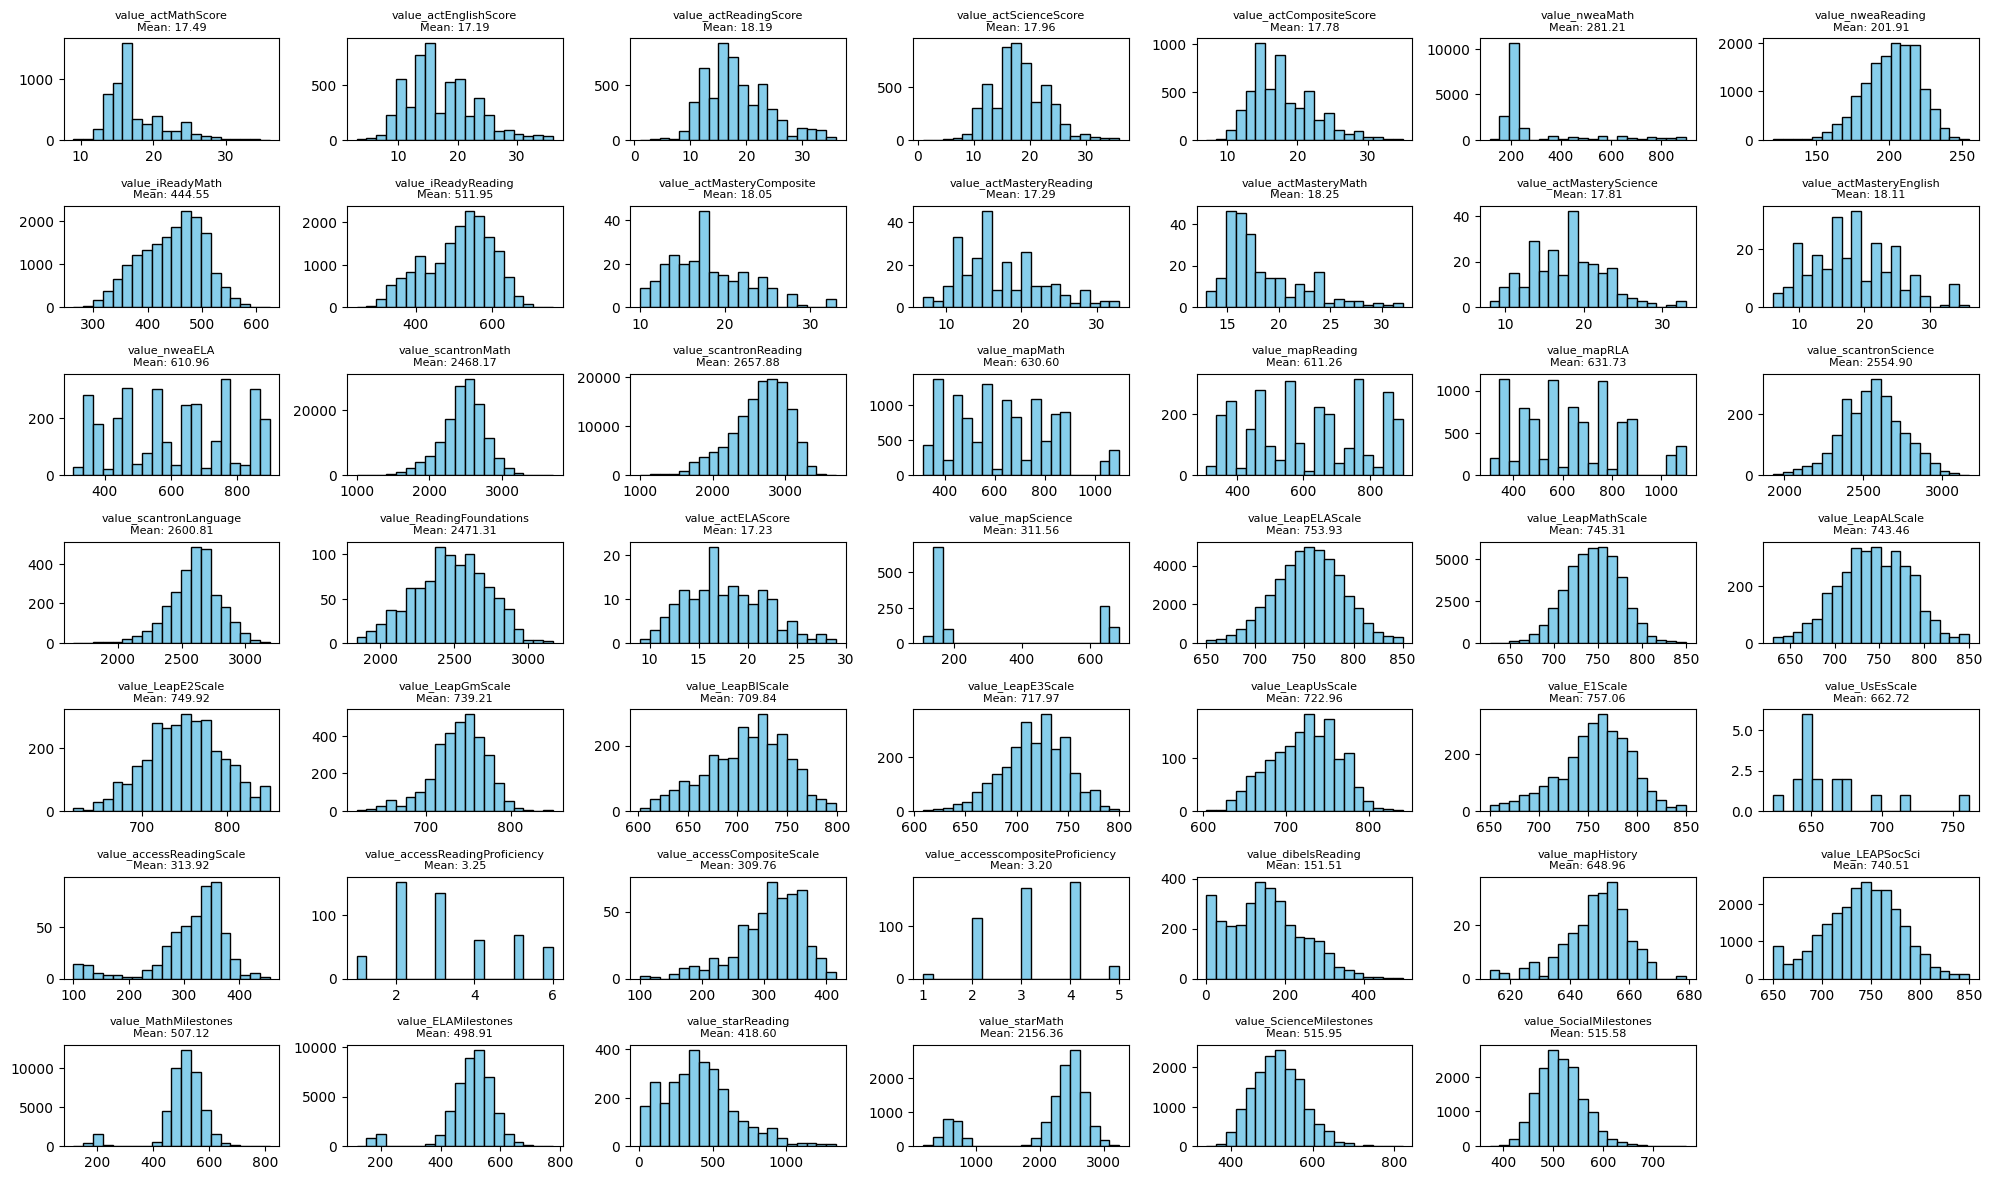

In [42]:
import matplotlib.pyplot as plt

# List of score columns
score_columns = [
    'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
    'value_actScienceScore', 'value_actCompositeScore', 'value_nweaMath',
    'value_nweaReading', 'value_iReadyMath', 'value_iReadyReading',
    'value_actMasteryComposite', 'value_actMasteryReading', 'value_actMasteryMath',
    'value_actMasteryScience', 'value_actMasteryEnglish', 'value_nweaELA',
    'value_scantronMath', 'value_scantronReading', 'value_mapMath', 
    'value_mapReading', 'value_mapRLA', 'value_scantronScience',
    'value_scantronLanguage', 'value_ReadingFoundations', 'value_actELAScore',
    'value_mapScience', 'value_LeapELAScale', 'value_LeapMathScale', 
    'value_LeapALScale', 'value_LeapE2Scale', 'value_LeapGmScale',
    'value_LeapBlScale', 'value_LeapE3Scale', 'value_LeapUsScale',
    'value_E1Scale', 'value_UsEsScale', 'value_accessReadingScale', 
    'value_accessReadingProficiency', 'value_accessCompositeScale',
    'value_accesscompositeProficiency', 'value_dibelsReading', 
    'value_mapHistory', 'value_LEAPSocSci', 'value_MathMilestones', 
    'value_ELAMilestones', 'value_starReading', 'value_starMath', 
    'value_ScienceMilestones', 'value_SocialMilestones'
]

# Create figure
plt.figure(figsize=(20, 15))

# Iterate through score columns and plot
for i, col in enumerate(score_columns, 1):
    plt.subplot(9, 7, i)  # Adjust rows/columns based on the number of score columns
    
    # Filter out invalid values (<= 0) and compute mean
    filtered_data = scores_df[col].dropna()
    filtered_data = filtered_data[filtered_data > 0]
    mean_value = filtered_data.mean()  # Calculate mean

    # Plot histogram
    plt.hist(filtered_data, bins=20, color='skyblue', edgecolor='black')
    
    # Add title and mean value
    plt.title(f'{col}\nMean: {mean_value:.2f}', fontsize=8)  # Display mean below title

    plt.tight_layout(pad=1.0)

# Show plot
plt.show()


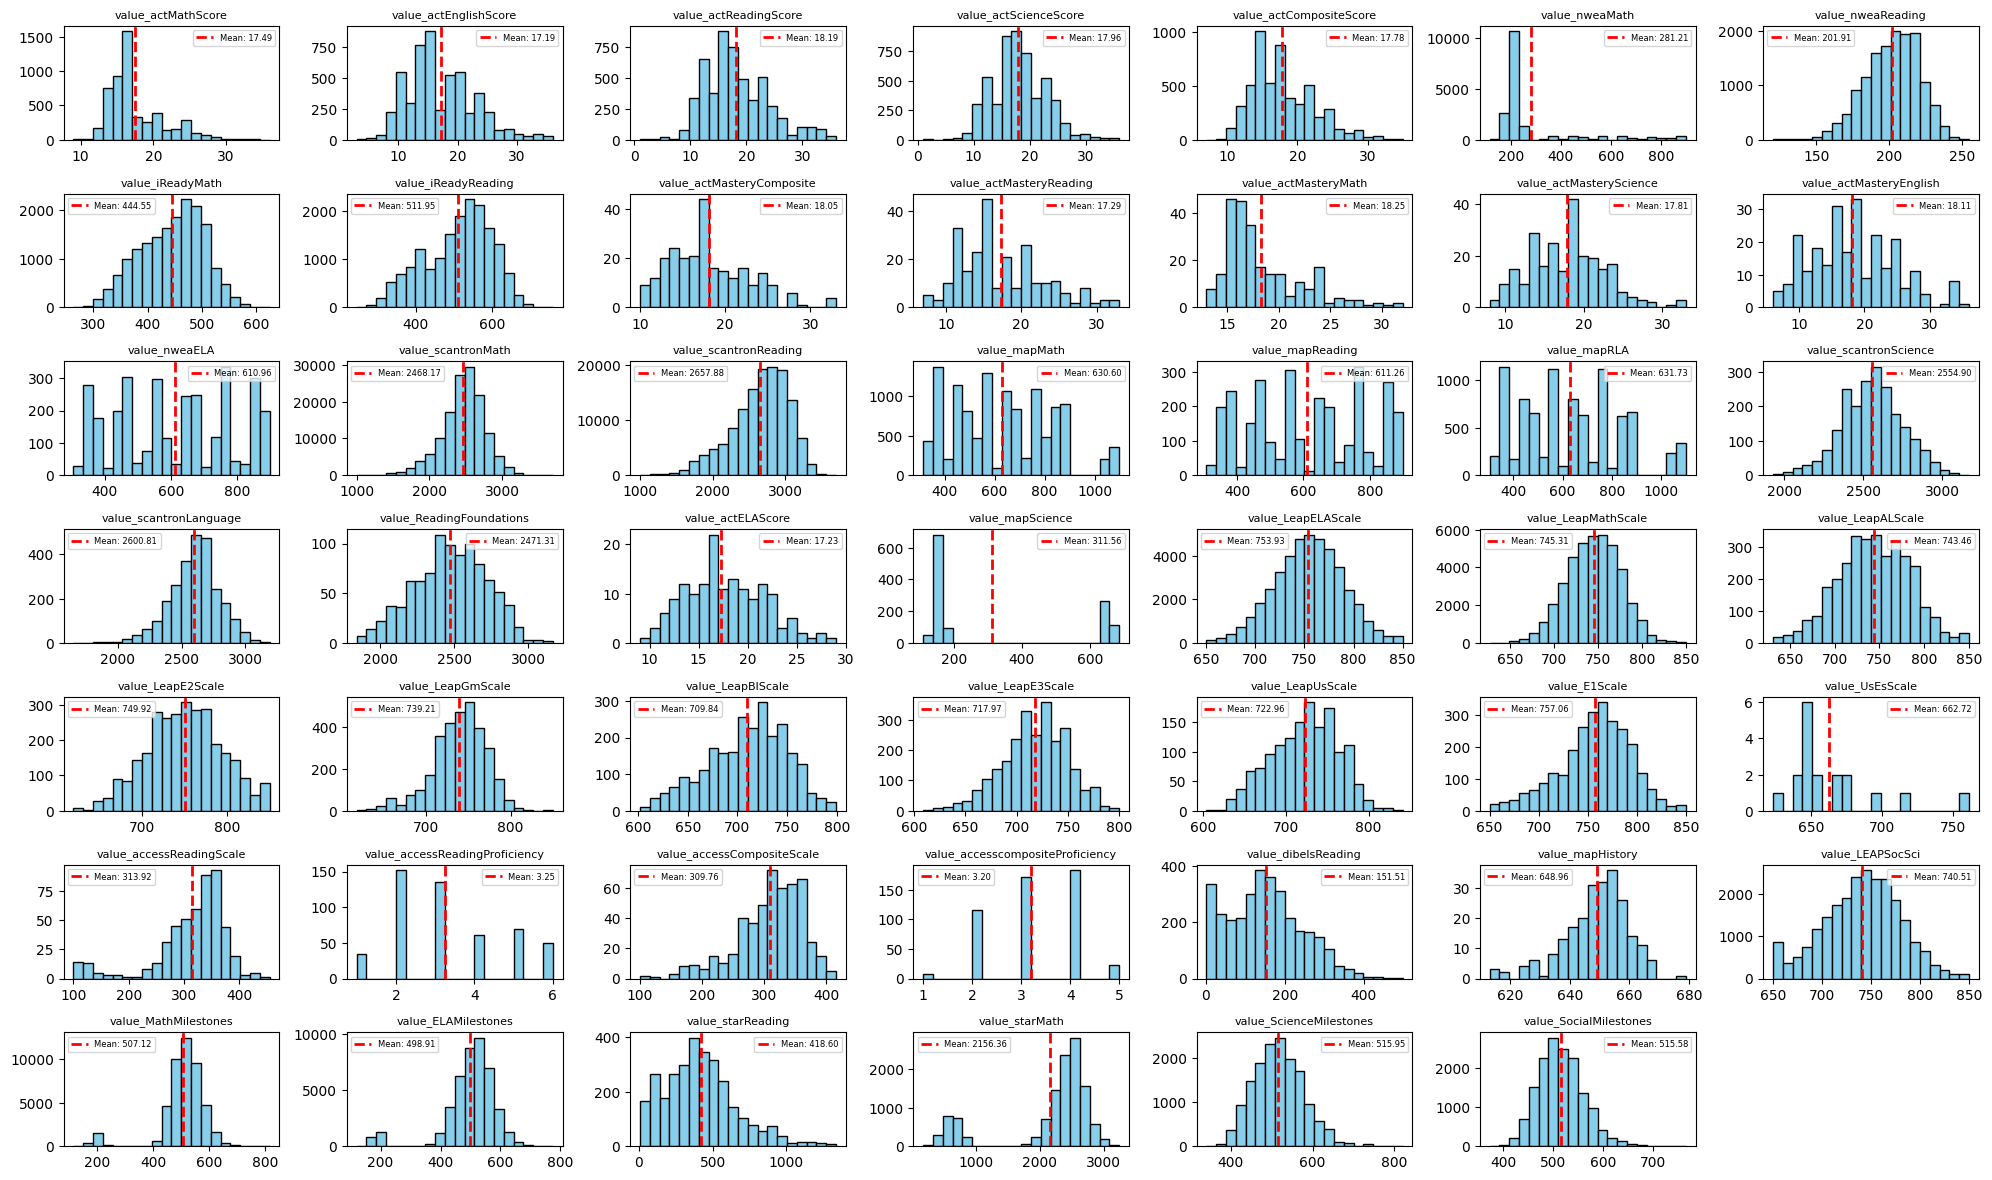

In [43]:
import matplotlib.pyplot as plt

# List of score columns
score_columns = [
    'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
    'value_actScienceScore', 'value_actCompositeScore', 'value_nweaMath',
    'value_nweaReading', 'value_iReadyMath', 'value_iReadyReading',
    'value_actMasteryComposite', 'value_actMasteryReading', 'value_actMasteryMath',
    'value_actMasteryScience', 'value_actMasteryEnglish', 'value_nweaELA',
    'value_scantronMath', 'value_scantronReading', 'value_mapMath', 
    'value_mapReading', 'value_mapRLA', 'value_scantronScience',
    'value_scantronLanguage', 'value_ReadingFoundations', 'value_actELAScore',
    'value_mapScience', 'value_LeapELAScale', 'value_LeapMathScale', 
    'value_LeapALScale', 'value_LeapE2Scale', 'value_LeapGmScale',
    'value_LeapBlScale', 'value_LeapE3Scale', 'value_LeapUsScale',
    'value_E1Scale', 'value_UsEsScale', 'value_accessReadingScale', 
    'value_accessReadingProficiency', 'value_accessCompositeScale',
    'value_accesscompositeProficiency', 'value_dibelsReading', 
    'value_mapHistory', 'value_LEAPSocSci', 'value_MathMilestones', 
    'value_ELAMilestones', 'value_starReading', 'value_starMath', 
    'value_ScienceMilestones', 'value_SocialMilestones'
]

# Create figure
plt.figure(figsize=(20, 15))

# Iterate through score columns and plot
for i, col in enumerate(score_columns, 1):
    plt.subplot(9, 7, i)  # Adjust rows/columns based on the number of score columns
    
    # Filter out invalid values (<= 0) and compute mean
    filtered_data = scores_df[col].dropna()
    filtered_data = filtered_data[filtered_data > 0]
    mean_value = filtered_data.mean()  # Calculate mean

    # Plot histogram
    plt.hist(filtered_data, bins=20, color='skyblue', edgecolor='black')

    # Add vertical line for mean
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')

    # Add title and mean value
    plt.title(col, fontsize=8)

    # Add legend for the mean value
    plt.legend(fontsize=6)

    plt.tight_layout(pad=1.0)

# Show plot
plt.show()


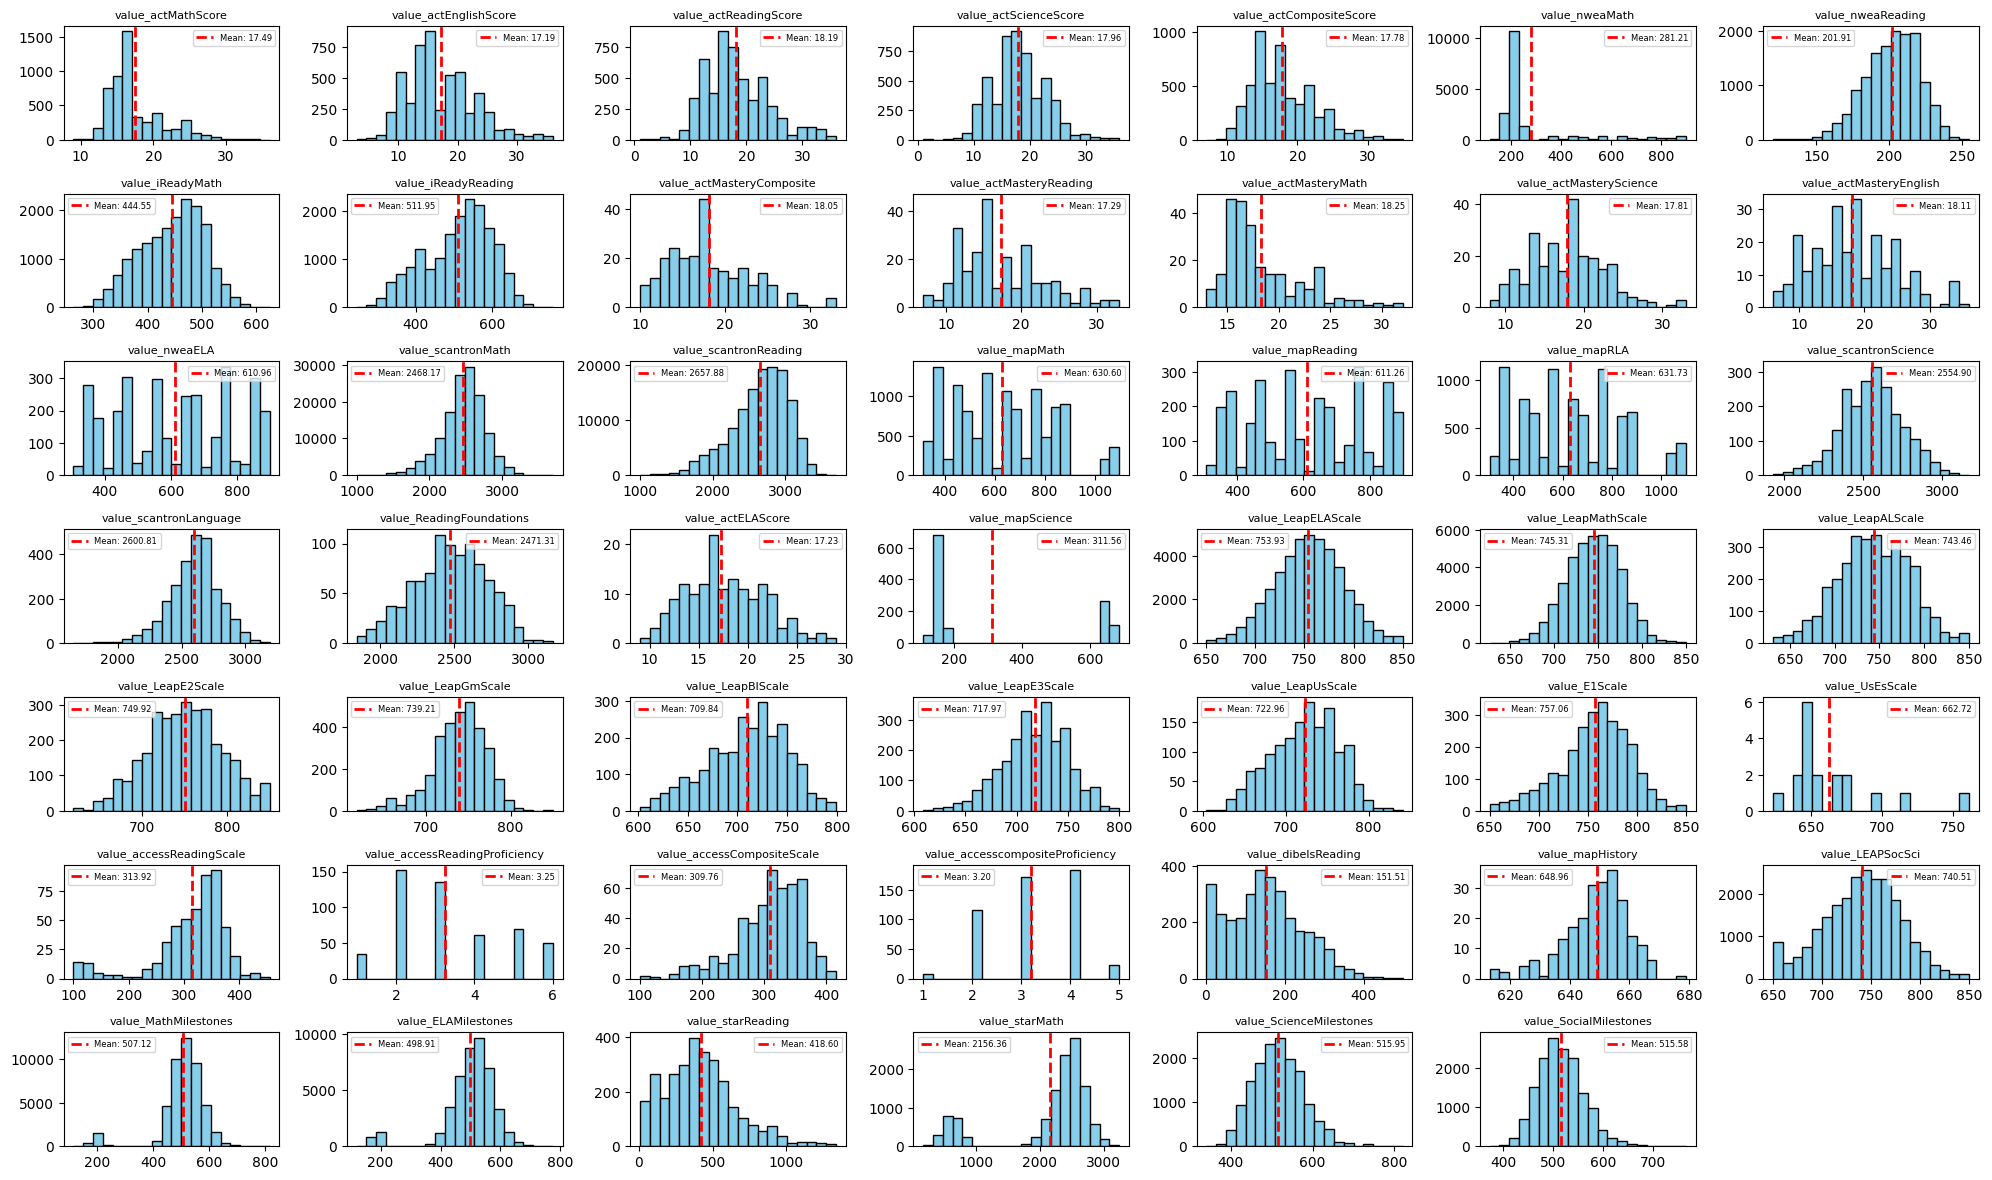

                        Score Column   Mean Value
0                 value_actMathScore    17.494675
1              value_actEnglishScore    17.194598
2              value_actReadingScore    18.185502
3              value_actScienceScore    17.958151
4            value_actCompositeScore    17.775758
5                     value_nweaMath   281.212403
6                  value_nweaReading   201.914538
7                   value_iReadyMath   444.546297
8                value_iReadyReading   511.949770
9          value_actMasteryComposite    18.047619
10           value_actMasteryReading    17.293651
11              value_actMasteryMath    18.250000
12           value_actMasteryScience    17.813492
13           value_actMasteryEnglish    18.107143
14                     value_nweaELA   610.958601
15                value_scantronMath  2468.174891
16             value_scantronReading  2657.883387
17                     value_mapMath   630.597841
18                  value_mapReading   611.261921


In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# List of score columns
score_columns = [
    'value_actMathScore', 'value_actEnglishScore', 'value_actReadingScore',
    'value_actScienceScore', 'value_actCompositeScore', 'value_nweaMath',
    'value_nweaReading', 'value_iReadyMath', 'value_iReadyReading',
    'value_actMasteryComposite', 'value_actMasteryReading', 'value_actMasteryMath',
    'value_actMasteryScience', 'value_actMasteryEnglish', 'value_nweaELA',
    'value_scantronMath', 'value_scantronReading', 'value_mapMath', 
    'value_mapReading', 'value_mapRLA', 'value_scantronScience',
    'value_scantronLanguage', 'value_ReadingFoundations', 'value_actELAScore',
    'value_mapScience', 'value_LeapELAScale', 'value_LeapMathScale', 
    'value_LeapALScale', 'value_LeapE2Scale', 'value_LeapGmScale',
    'value_LeapBlScale', 'value_LeapE3Scale', 'value_LeapUsScale',
    'value_E1Scale', 'value_UsEsScale', 'value_accessReadingScale', 
    'value_accessReadingProficiency', 'value_accessCompositeScale',
    'value_accesscompositeProficiency', 'value_dibelsReading', 
    'value_mapHistory', 'value_LEAPSocSci', 'value_MathMilestones', 
    'value_ELAMilestones', 'value_starReading', 'value_starMath', 
    'value_ScienceMilestones', 'value_SocialMilestones'
]

# Create an empty dictionary to store the mean values
mean_values = {}

# Create figure
plt.figure(figsize=(20, 15))

# Iterate through score columns and plot
for i, col in enumerate(score_columns, 1):
    plt.subplot(9, 7, i)  # Adjust rows/columns based on the number of score columns
    
    # Filter out invalid values (<= 0) and compute mean
    filtered_data = scores_df[col].dropna()
    filtered_data = filtered_data[filtered_data > 0]
    mean_value = filtered_data.mean()  # Calculate mean

    # Store the mean in the dictionary
    mean_values[col] = mean_value

    # Plot histogram
    plt.hist(filtered_data, bins=20, color='skyblue', edgecolor='black')

    # Add vertical line for mean
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')

    # Add title and mean value
    plt.title(col, fontsize=8)

    # Add legend for the mean value
    plt.legend(fontsize=6)

    plt.tight_layout(pad=1.0)

# Show plot
plt.show()

# Convert the dictionary into a DataFrame
mean_df = pd.DataFrame(list(mean_values.items()), columns=['Score Column', 'Mean Value'])

# Display the new DataFrame containing means
print(mean_df)


In [45]:
mean_df

Score Column   Mean Value
0                 value_actMathScore    17.494675
1              value_actEnglishScore    17.194598
2              value_actReadingScore    18.185502
3              value_actScienceScore    17.958151
4            value_actCompositeScore    17.775758
5                     value_nweaMath   281.212403
6                  value_nweaReading   201.914538
7                   value_iReadyMath   444.546297
8                value_iReadyReading   511.949770
9          value_actMasteryComposite    18.047619
10           value_actMasteryReading    17.293651
11              value_actMasteryMath    18.250000
12           value_actMasteryScience    17.813492
13           value_actMasteryEnglish    18.107143
14                     value_nweaELA   610.958601
15                value_scantronMath  2468.174891
16             value_scantronReading  2657.883387
17                     value_mapMath   630.597841
18                  value_mapReading   611.261921
19                      value_mapRLA   631.726110
20             value_scantronScience  2554.897127
21            value_scantronLanguage  2600.811805
22          value_ReadingFoundations  2471.305931
23                 value_actELAScore    17.232258
24                  value_mapScience   311.559068
25                value_LeapELAScale   753.926373
26               value_LeapMathScale   745.305385
27                 value_LeapALScale   743.464594
28                 value_LeapE2Scale   749.924528
29                 value_LeapGmScale   739.206097
30                 value_LeapBlScale   709.839764
31                 value_LeapE3Scale   717.966522
32                 value_LeapUsScale   722.963823
33                     value_E1Scale   757.060860
34                   value_UsEsScale   662.722222
35          value_accessReadingScale   313.918327
36    value_accessReadingProficiency     3.252988
37        value_accessCompositeScale   309.758483
38  value_accesscompositeProficiency     3.195609
39               value_dibelsReading   151.507202
40                  value_mapHistory   648.956710
41                  value_LEAPSocSci   740.507275
42              value_MathMilestones   507.119252
43               value_ELAMilestones   498.910792
44                 value_starReading   418.599538
45                    value_starMath  2156.357096
46           value_ScienceMilestones   515.950597
47            value_SocialMilestones   515.578673

In [47]:
benchmarks_df

districtId  year  level                     dataSource  threshold
0           45  2017      3             value_scantronMath     2356.0
1           45  2017      3          value_scantronReading     2563.0
2           45  2017      4             value_scantronMath     2493.0
3           45  2017      4          value_scantronReading     2674.0
4           45  2017      5             value_scantronMath     2584.0
5           45  2017      5          value_scantronReading     2841.0
6           45  2017      6             value_scantronMath     2675.0
7           45  2017      6          value_scantronReading     2897.0
8           45  2017      7             value_scantronMath     2766.0
9           45  2017      7          value_scantronReading     3008.0
10          45  2017      8             value_scantronMath     2823.0
11          45  2017      8          value_scantronReading     3063.0
12          45  2017     11        value_actCompositeScore       19.5
13          45  2018      3             value_scantronMath     2364.0
14          45  2018      3          value_scantronReading     2518.0
15          45  2018      3  value_aspireReadingScaleScore      250.0
16          45  2018      3                 value_starMath     1900.0
17          45  2018      4             value_scantronMath     2488.0
18          45  2018      4          value_scantronReading     2678.0
19          45  2018      4  value_aspireReadingScaleScore      260.0
20          45  2018      4                 value_starMath     2488.0
21          45  2018      5             value_scantronMath     2589.0
22          45  2018      5          value_scantronReading     2798.0
23          45  2018      5  value_aspireReadingScaleScore      270.0
24          45  2018      5                 value_starMath     2589.0
25          45  2018      6             value_scantronMath     2667.0
26          45  2018      6          value_scantronReading     2883.0
27          45  2018      6  value_aspireReadingScaleScore      275.0
28          45  2018      6                 value_starMath     2667.0
29          45  2018      7             value_scantronMath     2743.0
30          45  2018      7          value_scantronReading     2954.0
31          45  2018      7  value_aspireReadingScaleScore      280.0
32          45  2018      7                 value_starMath     2743.0
33          45  2018      8             value_scantronMath     2788.0
34          45  2018      8          value_scantronReading     3019.0
35          45  2018      8  value_aspireReadingScaleScore      290.0
36          45  2018      8                 value_starMath     2788.0
37          45  2018     11        value_actCompositeScore       19.1
38          45  2018     11             value_actMathScore       17.0
39          45  2018     11          value_actReadingScore       18.0
40          45  2018     11          value_actEnglishScore       18.0
41          45  2018     11          value_actScienceScore       18.0

In [48]:
import pandas as pd

# Assume mean_df and benchmarks_df are already defined as per your data

# Merge benchmarks_df with mean_df where 'dataSource' matches 'Score Column'
benchmarks_df_updated = pd.merge(
    benchmarks_df, 
    mean_df, 
    left_on='dataSource',  # Column from benchmarks_df
    right_on='Score Column',  # Column from mean_df
    how='left'  # Keep all rows from benchmarks_df and add matching rows from mean_df
)

# Drop the 'Score Column' after the merge since it's not needed in benchmarks_df
benchmarks_df_updated.drop(columns=['Score Column'], inplace=True)

# Display the updated benchmarks_df
benchmarks_df_updated


    districtId  year  level                     dataSource  threshold  \
0           45  2017      3             value_scantronMath     2356.0   
1           45  2017      3          value_scantronReading     2563.0   
2           45  2017      4             value_scantronMath     2493.0   
3           45  2017      4          value_scantronReading     2674.0   
4           45  2017      5             value_scantronMath     2584.0   
5           45  2017      5          value_scantronReading     2841.0   
6           45  2017      6             value_scantronMath     2675.0   
7           45  2017      6          value_scantronReading     2897.0   
8           45  2017      7             value_scantronMath     2766.0   
9           45  2017      7          value_scantronReading     3008.0   
10          45  2017      8             value_scantronMath     2823.0   
11          45  2017      8          value_scantronReading     3063.0   
12          45  2017     11        value_actComposi

In [49]:
benchmarks_df_updated

districtId  year  level                     dataSource  threshold  \
0           45  2017      3             value_scantronMath     2356.0   
1           45  2017      3          value_scantronReading     2563.0   
2           45  2017      4             value_scantronMath     2493.0   
3           45  2017      4          value_scantronReading     2674.0   
4           45  2017      5             value_scantronMath     2584.0   
5           45  2017      5          value_scantronReading     2841.0   
6           45  2017      6             value_scantronMath     2675.0   
7           45  2017      6          value_scantronReading     2897.0   
8           45  2017      7             value_scantronMath     2766.0   
9           45  2017      7          value_scantronReading     3008.0   
10          45  2017      8             value_scantronMath     2823.0   
11          45  2017      8          value_scantronReading     3063.0   
12          45  2017     11        value_actCompositeScore       19.5   
13          45  2018      3             value_scantronMath     2364.0   
14          45  2018      3          value_scantronReading     2518.0   
15          45  2018      3  value_aspireReadingScaleScore      250.0   
16          45  2018      3                 value_starMath     1900.0   
17          45  2018      4             value_scantronMath     2488.0   
18          45  2018      4          value_scantronReading     2678.0   
19          45  2018      4  value_aspireReadingScaleScore      260.0   
20          45  2018      4                 value_starMath     2488.0   
21          45  2018      5             value_scantronMath     2589.0   
22          45  2018      5          value_scantronReading     2798.0   
23          45  2018      5  value_aspireReadingScaleScore      270.0   
24          45  2018      5                 value_starMath     2589.0   
25          45  2018      6             value_scantronMath     2667.0   
26          45  2018      6          value_scantronReading     2883.0   
27          45  2018      6  value_aspireReadingScaleScore      275.0   
28          45  2018      6                 value_starMath     2667.0   
29          45  2018      7             value_scantronMath     2743.0   
30          45  2018      7          value_scantronReading     2954.0   
31          45  2018      7  value_aspireReadingScaleScore      280.0   
32          45  2018      7                 value_starMath     2743.0   
33          45  2018      8             value_scantronMath     2788.0   
34          45  2018      8          value_scantronReading     3019.0   
35          45  2018      8  value_aspireReadingScaleScore      290.0   
36          45  2018      8                 value_starMath     2788.0   
37          45  2018     11        value_actCompositeScore       19.1   
38          45  2018     11             value_actMathScore       17.0   
39          45  2018     11          value_actReadingScore       18.0   
40          45  2018     11          value_actEnglishScore       18.0   
41          45  2018     11          value_actScienceScore       18.0   

     Mean Value  
0   2468.174891  
1   2657.883387  
2   2468.174891  
3   2657.883387  
4   2468.174891  
5   2657.883387  
6   2468.174891  
7   2657.883387  
8   2468.174891  
9   2657.883387  
10  2468.174891  
11  2657.883387  
12    17.775758  
13  2468.174891  
14  2657.883387  
15          NaN  
16  2156.357096  
17  2468.174891  
18  2657.883387  
19          NaN  
20  2156.357096  
21  2468.174891  
22  2657.883387  
23          NaN  
24  2156.357096  
25  2468.174891  
26  2657.883387  
27          NaN  
28  2156.357096  
29  2468.174891  
30  2657.883387  
31          NaN  
32  2156.357096  
33  2468.174891  
34  2657.883387  
35          NaN  
36  2156.357096  
37    17.775758  
38    17.494675  
39    18.185502  
40    17.194598  
41    17.958151

In [50]:
# Create the 'meetsThreshold' column
benchmarks_df_updated['meetsThreshold'] = benchmarks_df_updated['Mean Value'] > benchmarks_df_updated['threshold']

# Display the updated DataFrame
benchmarks_df_updated


districtId  year  level                     dataSource  threshold  \
0           45  2017      3             value_scantronMath     2356.0   
1           45  2017      3          value_scantronReading     2563.0   
2           45  2017      4             value_scantronMath     2493.0   
3           45  2017      4          value_scantronReading     2674.0   
4           45  2017      5             value_scantronMath     2584.0   
5           45  2017      5          value_scantronReading     2841.0   
6           45  2017      6             value_scantronMath     2675.0   
7           45  2017      6          value_scantronReading     2897.0   
8           45  2017      7             value_scantronMath     2766.0   
9           45  2017      7          value_scantronReading     3008.0   
10          45  2017      8             value_scantronMath     2823.0   
11          45  2017      8          value_scantronReading     3063.0   
12          45  2017     11        value_actCompositeScore       19.5   
13          45  2018      3             value_scantronMath     2364.0   
14          45  2018      3          value_scantronReading     2518.0   
15          45  2018      3  value_aspireReadingScaleScore      250.0   
16          45  2018      3                 value_starMath     1900.0   
17          45  2018      4             value_scantronMath     2488.0   
18          45  2018      4          value_scantronReading     2678.0   
19          45  2018      4  value_aspireReadingScaleScore      260.0   
20          45  2018      4                 value_starMath     2488.0   
21          45  2018      5             value_scantronMath     2589.0   
22          45  2018      5          value_scantronReading     2798.0   
23          45  2018      5  value_aspireReadingScaleScore      270.0   
24          45  2018      5                 value_starMath     2589.0   
25          45  2018      6             value_scantronMath     2667.0   
26          45  2018      6          value_scantronReading     2883.0   
27          45  2018      6  value_aspireReadingScaleScore      275.0   
28          45  2018      6                 value_starMath     2667.0   
29          45  2018      7             value_scantronMath     2743.0   
30          45  2018      7          value_scantronReading     2954.0   
31          45  2018      7  value_aspireReadingScaleScore      280.0   
32          45  2018      7                 value_starMath     2743.0   
33          45  2018      8             value_scantronMath     2788.0   
34          45  2018      8          value_scantronReading     3019.0   
35          45  2018      8  value_aspireReadingScaleScore      290.0   
36          45  2018      8                 value_starMath     2788.0   
37          45  2018     11        value_actCompositeScore       19.1   
38          45  2018     11             value_actMathScore       17.0   
39          45  2018     11          value_actReadingScore       18.0   
40          45  2018     11          value_actEnglishScore       18.0   
41          45  2018     11          value_actScienceScore       18.0   

     Mean Value  meetsThreshold  
0   2468.174891            True  
1   2657.883387            True  
2   2468.174891           False  
3   2657.883387           False  
4   2468.174891           False  
5   2657.883387           False  
6   2468.174891           False  
7   2657.883387           False  
8   2468.174891           False  
9   2657.883387           False  
10  2468.174891           False  
11  2657.883387           False  
12    17.775758           False  
13  2468.174891            True  
14  2657.883387            True  
15          NaN           False  
16  2156.357096            True  
17  2468.174891           False  
18  2657.883387           False  
19          NaN           False  
20  2156.357096           False  
21  2468.174891           False  
22  2657.883387           False  
23          NaN           False  
24  2156.35709